### Problem statement: <br>
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


In [115]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Task to be performed:
1.	Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.<br>
b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy <br>

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data <br>
b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot <br>
c.	Study the occurrence of CVD across the Age category <br>
d.	Study the composition of all patients with respect to the Sex category <br>
e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient <br>
f.	Describe the relationship between cholesterol levels and a target variable <br>
g.	State what relationship exists between peak exercising and the occurrence of a heart attack <br>
h.	Check if thalassemia is a major cause of CVD <br>
i.	List how the other factors determine the occurrence of CVD <br>
j.	Use a pair plot to understand the relationship between all the given variables <br>

3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [116]:
# Importing Database
df=pd.read_excel("1645792390_cep1_dataset.xlsx")

In [117]:
df.shape

(303, 14)

### Preliminary analysis:
1. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [118]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [119]:
# Checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [121]:
# Checking and Finding duplication
any(df.duplicated())

True

In [122]:
dublication=df.duplicated()

In [123]:
dub_rows=df[dublication]

In [124]:
dub_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [125]:
# Dropping Dublication
df.drop_duplicates(inplace=True)

In [126]:
any(df.duplicated())

False

In [127]:
df.shape

(302, 14)

###  Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

A. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


<Axes: >

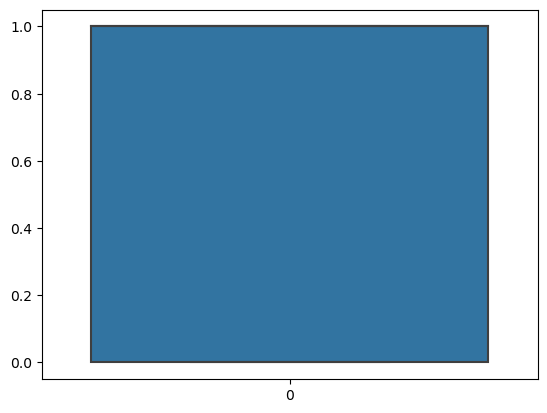

In [129]:
# Checking Outliers in Target variable
sns.boxplot(df.target)

In [130]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [131]:
# Assumtion that the variable with less unique values are categorical and with high unique values are numerical.
# Seperation of data
df_num_var=["age", "trestbps", "chol", "thalach", "oldpeak"]
df_cat_var=["sex", "cp", "fbs", "restecg","exang", "slope", "ca", "thal", "target"]

In [132]:
df_num_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [133]:
import warnings
warnings.filterwarnings("ignore")

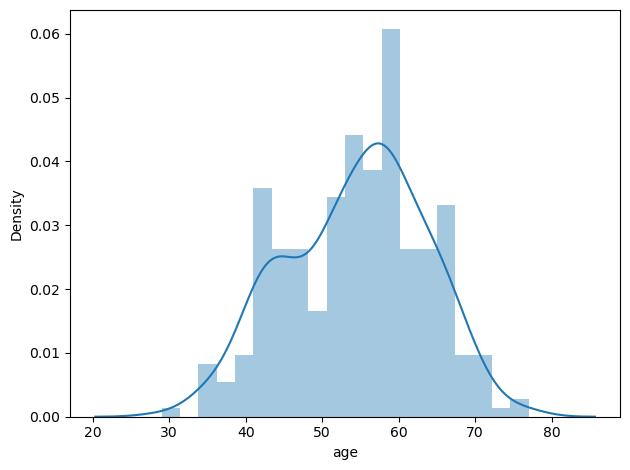

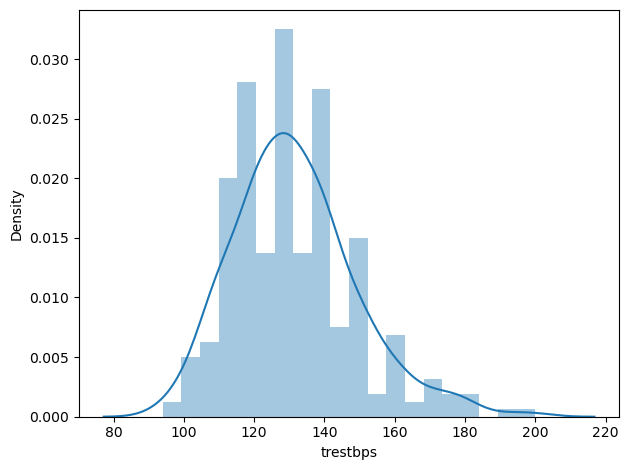

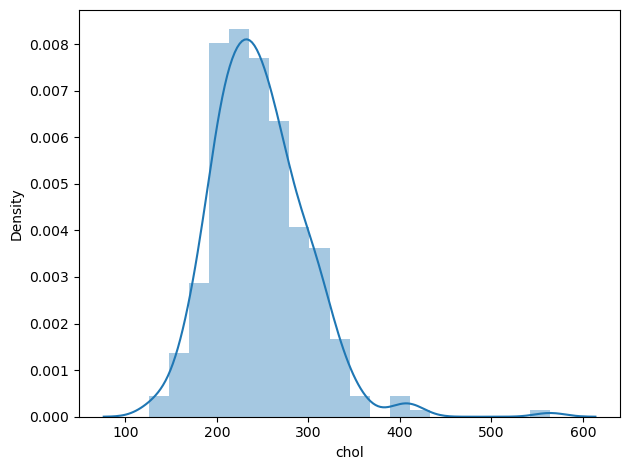

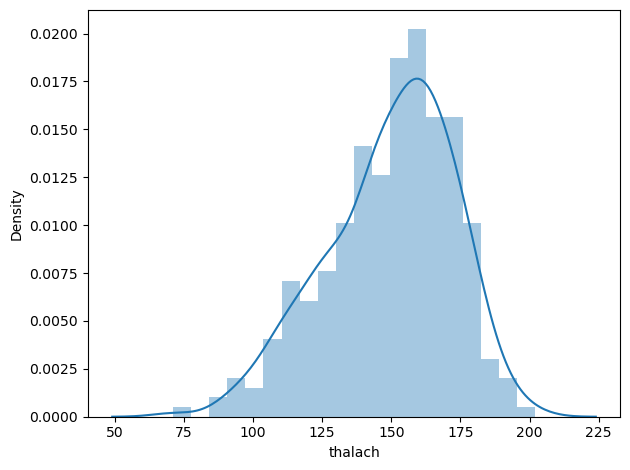

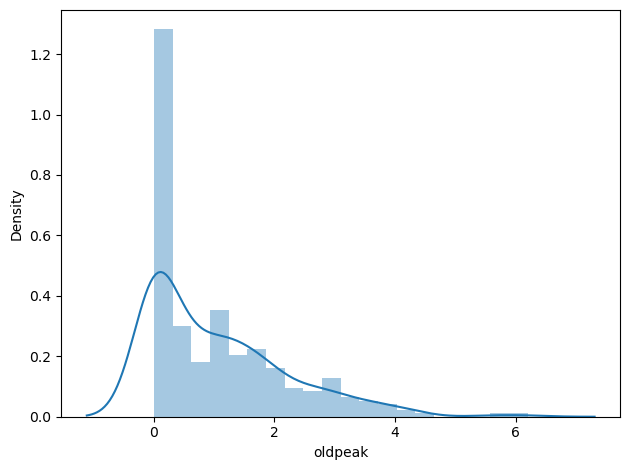

In [134]:
#Exploring categorical data
for i in df_num_var:
    sns.distplot(df[i], bins=20)
    plt.tight_layout()
    plt.show()


### Analysis from the above graph

1. Age: Risk age group is between 50 -60
2. Trestbps: Blood pressere of between 110-145 are likely to be in a danger zone.
3. Chol: Majority of the patients have a cholestoral value between 200-300
4. Heartrate: Maximum patients have heartrate between 145-160
5. Oldpeak: Majority of the patiets are between 0-1.5

### 2.b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot

In [135]:
df[df_cat_var].describe().T

,count,mean,std,min,25%,50%,75%,max
sex,302.0,0.682119,0.466426,0.0,0.0,1.0,1.0,1.0
cp,302.0,0.963576,1.032044,0.0,0.0,1.0,2.0,3.0
fbs,302.0,0.149007,0.356686,0.0,0.0,0.0,0.0,1.0
restecg,302.0,0.526490,0.526027,0.0,0.0,1.0,1.0,2.0
exang,302.0,0.327815,0.470196,0.0,0.0,0.0,1.0,1.0
slope,302.0,1.397351,0.616274,0.0,1.0,1.0,2.0,2.0
ca,302.0,0.718543,1.006748,0.0,0.0,0.0,1.0,4.0
thal,302.0,2.314570,0.613026,0.0,2.0,2.0,3.0,3.0
target,302.0,0.543046,0.498970,0.0,0.0,1.0,1.0,1.0


In [136]:
df[df_cat_var].head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [137]:
df[df_cat_var].tail()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0
302,0,1,0,0,0,1,1,2,0


In [138]:
df_cat_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [114]:
df_num_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [148]:
# Statistical view of categorical varaible

"""for i in df_cat_var:
    sns.countplot(x=df[df_cat_var][i], data= df)
    plt.show()"""

'for i in df_cat_var:\n    sns.countplot(x=df[df_cat_var][i], data= df)\n    plt.show()'

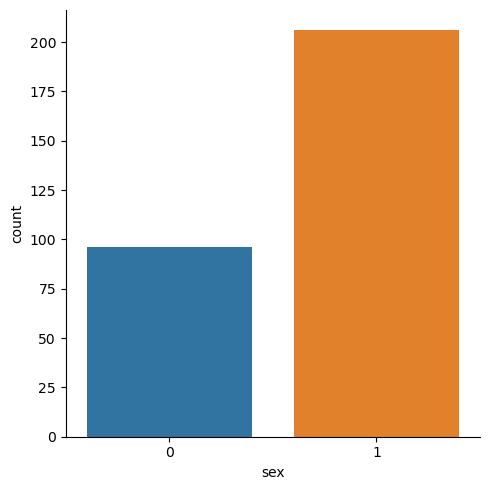

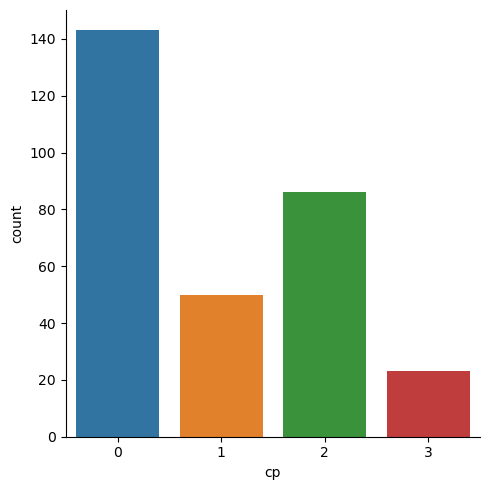

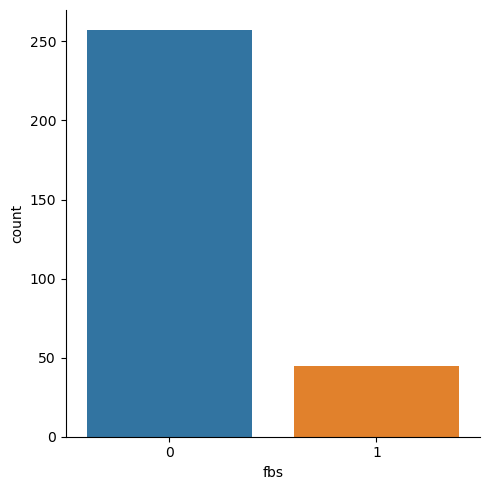

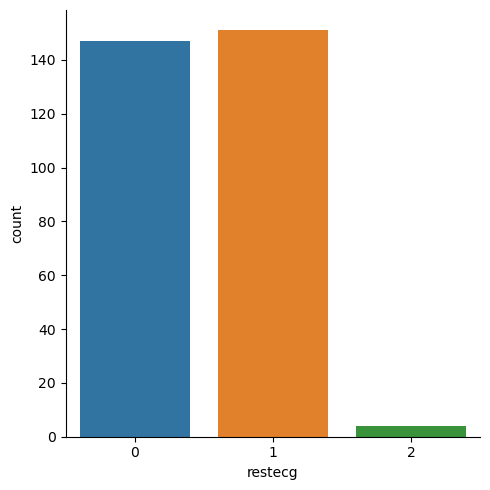

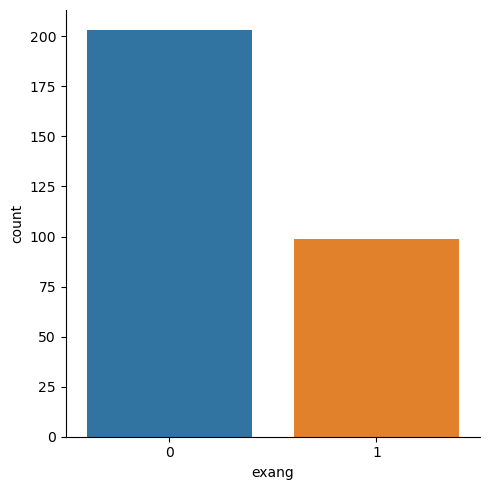

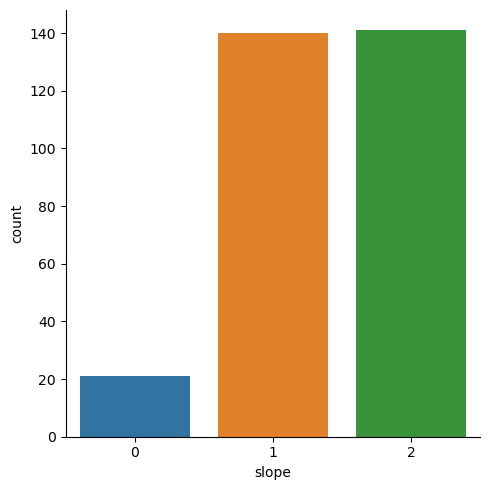

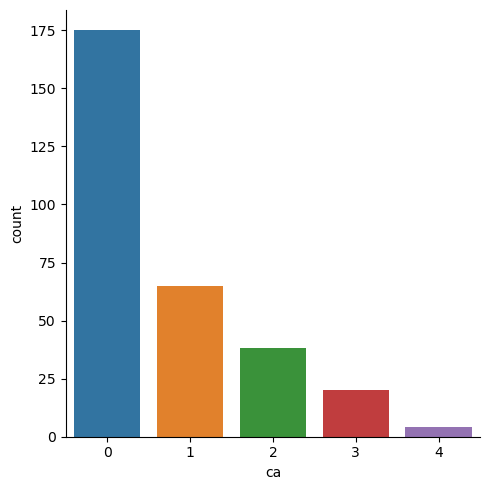

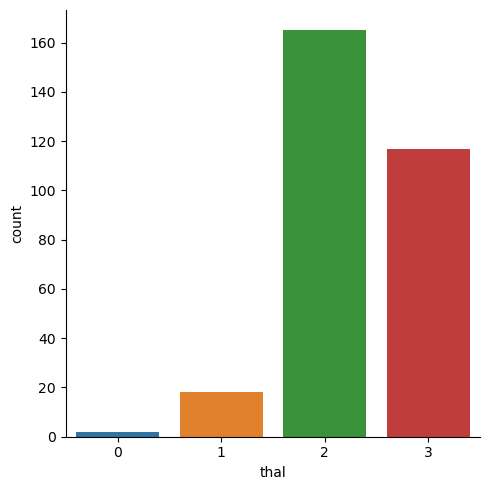

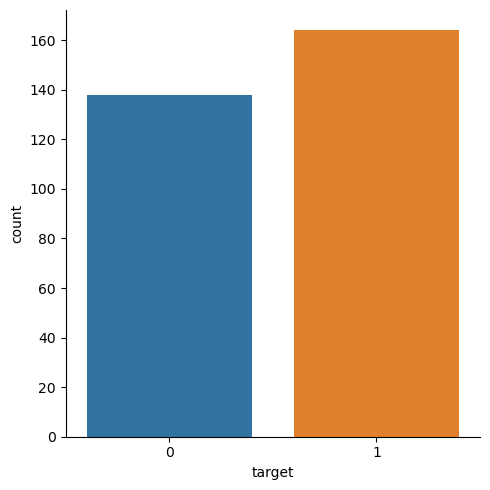

In [153]:

for i in df_cat_var:
    sns.catplot(x=i, kind="count", data= df, aspect=1)
    plt.tight_layout()
    plt.show()

### Data Analysis from above graph

1. Sex: More male patients, almost doubled so male are likely to suffer from cardio vascular
2. CP: Chest pain type: Type 0 & 2 has almost 70% of the total patiets
3. FB: Fasting Blood sugure > 120mg. Majority (80% +) has a fasting blood sugar highet than 120mg.
4. Resting electrocardiographic: Majority of the patients have a reading of 0 & 1, however some patients ate showing 2 value.
5. Exang: Exercised Indused angina. Almost 70 % of the patients has Exang.
6. Slope: Peak exercise segment of 1 and 2 are almost equal however 0 value is significatly low. 
7. CA: Number of major vessels(0-3) has higher reading.
8. Thal: 3 = normal; 6 = fixed defect; 7 = reversible defect. Reading 2 has the highest number of Thal, However 6 & / has no presence in a dataset, and observation 3 that is normal is significant.
9. Target value of 1, that is likely to get the cardiovascular attack is higher and data also shows the value of Male patiets has a higher chances of getting heartattack.

### Summary of the the visualization is: Male, Age between 50-60, with a blood pressure between 110-145, heartrate 145-160 has the highest chance of getting an attack.

c. Study the occurrence of CVD across the Age category

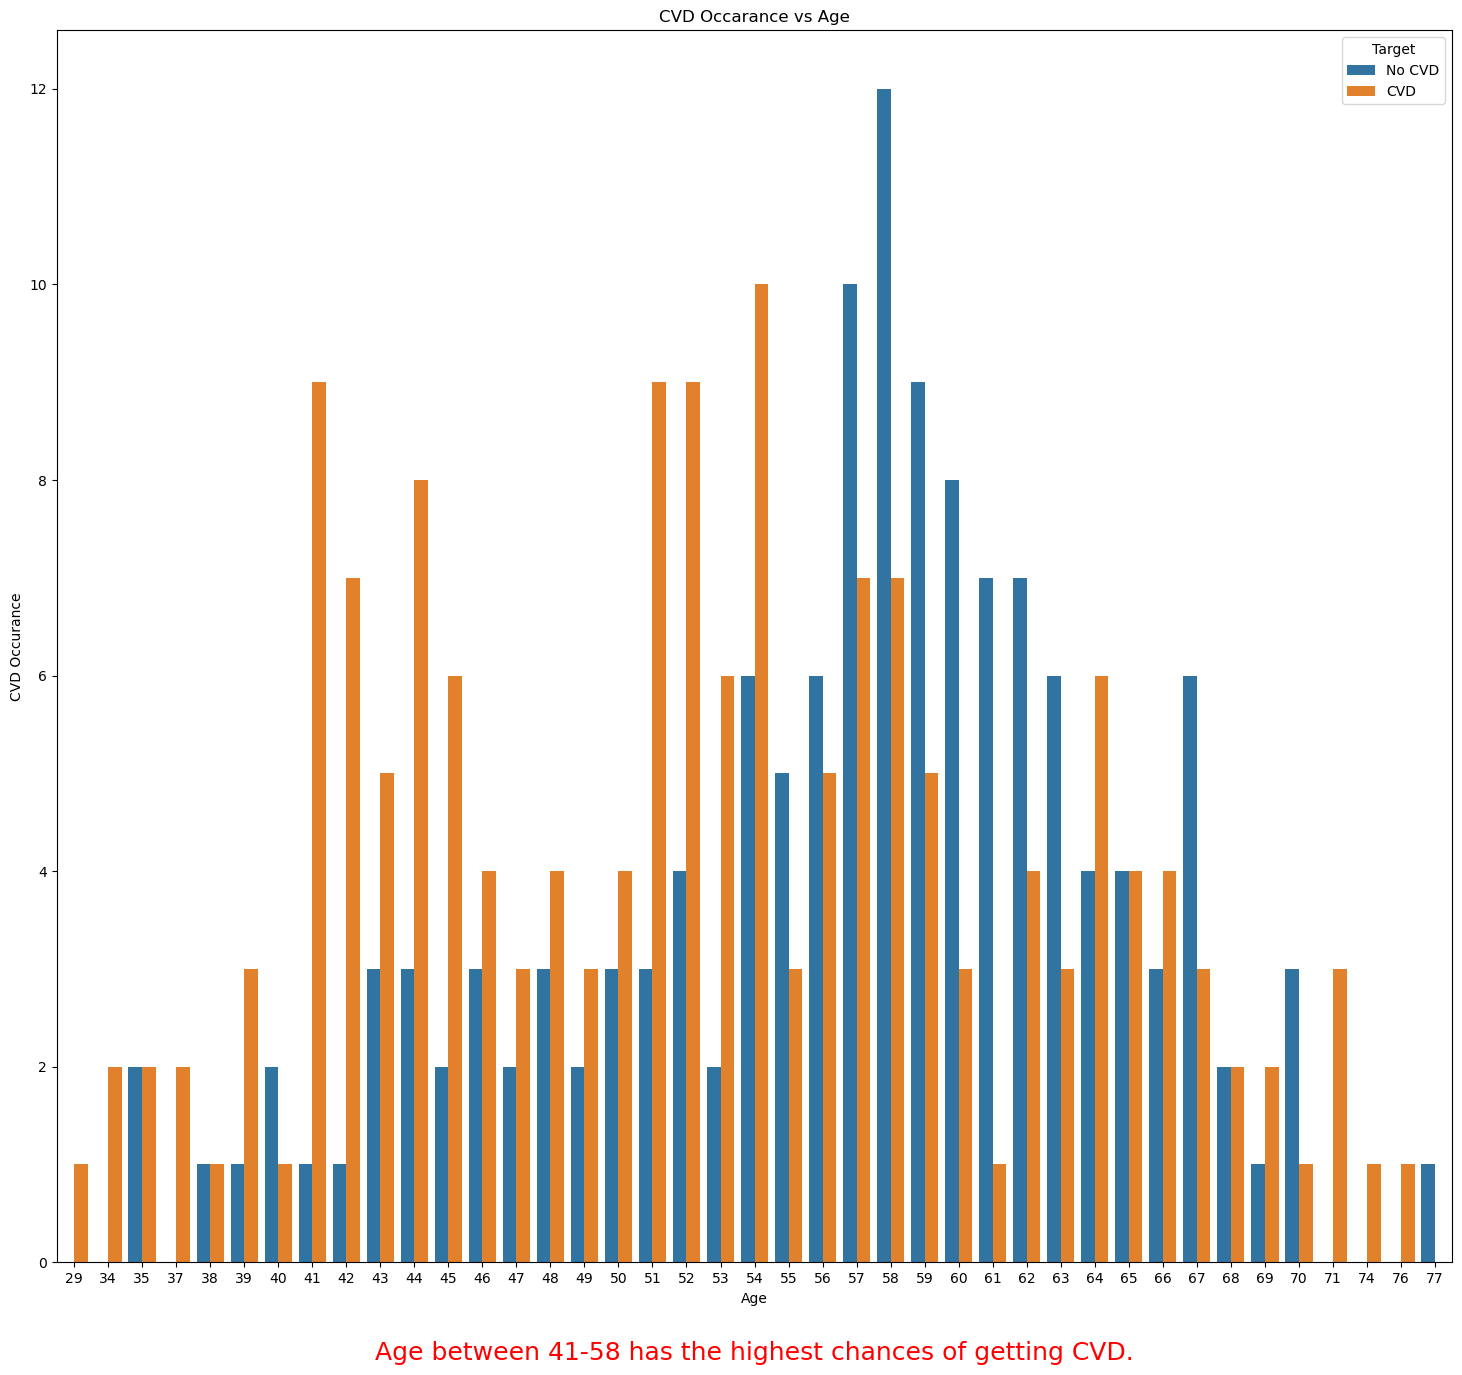

In [241]:
# occurrence of CVD across the Age category
plt.figure(figsize=(18,16))
sns.countplot(x="age", data=df, hue="target")
plt.title("CVD Occarance vs Age")
plt.xlabel("Age")
plt.ylabel("CVD Occurance")
plt.legend(title="Target", labels=["No CVD", "CVD"])
plt.text(20, -1, "Age between 41-58 has the highest chances of getting CVD.", fontsize=18, color='red', ha="center")
plt.show()

d. Study the composition of all patients with respect to the Sex category

In [209]:
df.columns

Index(['age', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal', 'target', 'exang',
       'oldpeak', 'trestbps', 'chol', 'thalach', 'sex'],
      dtype='object')

In [210]:
# Rearranging columns for better visualization

new_col_order=['age','cp','fbs', 'restecg', 'slope', 'ca', 'thal', 'target', 'exang', 'oldpeak', 'trestbps', 
               'chol','thalach','sex']
df=df.reindex(columns=new_col_order).copy()

In [211]:
df.columns


Index(['age', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal', 'target', 'exang',
       'oldpeak', 'trestbps', 'chol', 'thalach', 'sex'],
      dtype='object')

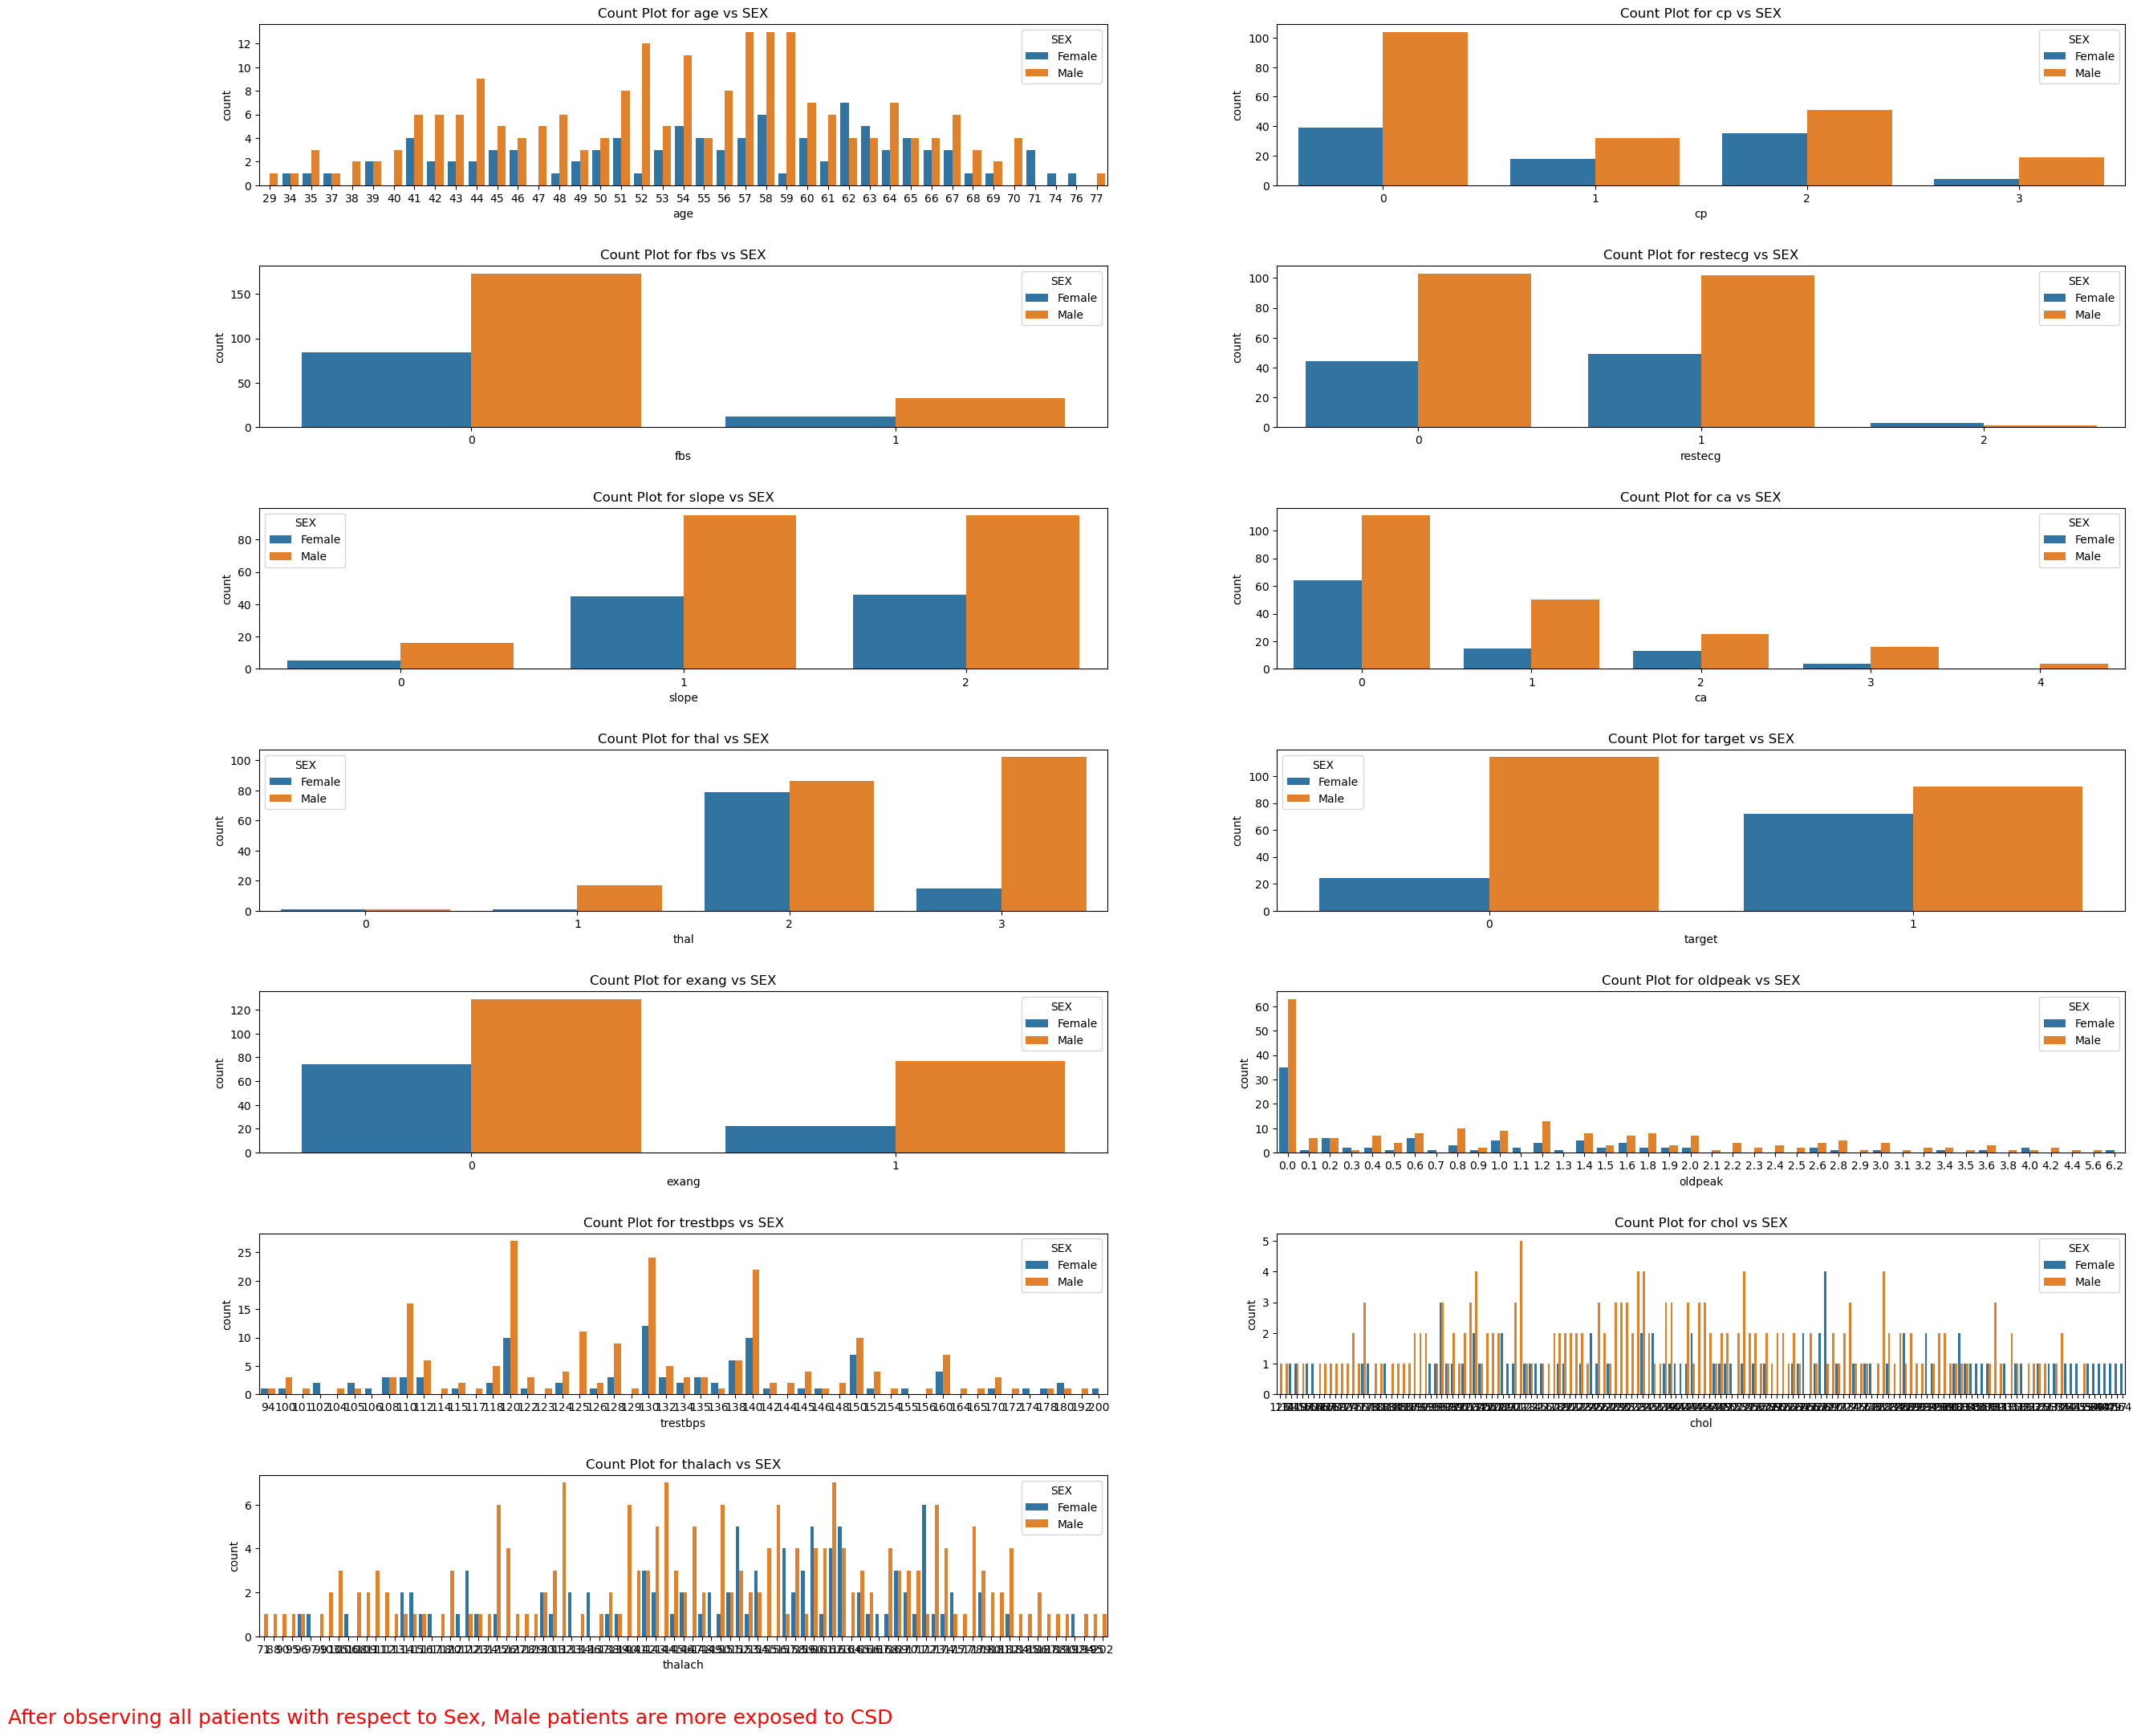

In [242]:
plt.figure (figsize=(30, 30))

for i, column_name in enumerate(df.columns[:-1], start=1):
    plt.subplot(8,2,i)
    sns.countplot(x=column_name, data=df, hue="sex")
    plt.legend(title="SEX", labels=["Female", "Male"])
    plt.title(f"Count Plot for {column_name} vs SEX")
plt.subplots_adjust(hspace=0.5)
plt.text(20, -4, "After observing all patients with respect to Sex, Male patients are more exposed to CSD", fontsize=18, color='red', ha="center")
plt.show()


### e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [243]:
df.head()

,age,cp,fbs,restecg,slope,ca,thal,target,exang,oldpeak,trestbps,chol,thalach,sex
0,63,3,1,0,0,0,1,1,0,2.3,145,233,150,1
1,37,2,0,1,0,0,2,1,0,3.5,130,250,187,1
2,41,1,0,0,2,0,2,1,0,1.4,130,204,172,0
3,56,1,0,1,2,0,2,1,0,0.8,120,236,178,1
4,57,0,0,1,2,0,2,1,1,0.6,120,354,163,0


<Axes: xlabel='target', ylabel='trestbps'>

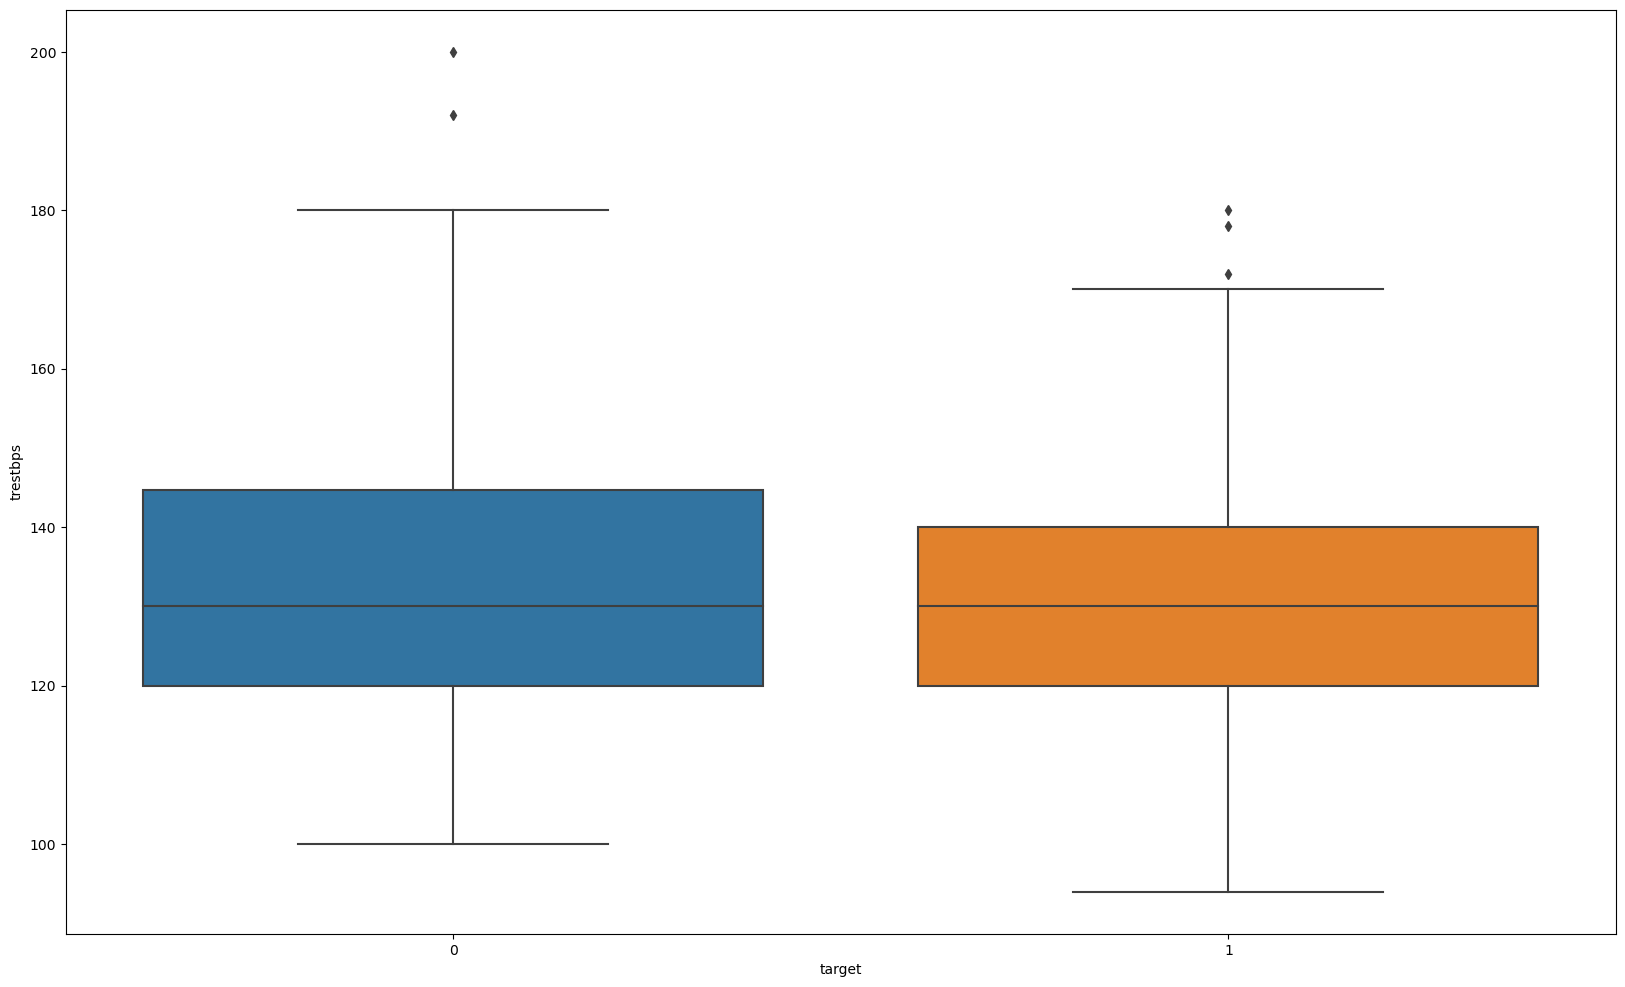

In [247]:
plt.figure (figsize=(20,12))
sns.boxplot(x="target", y="trestbps", data=df)


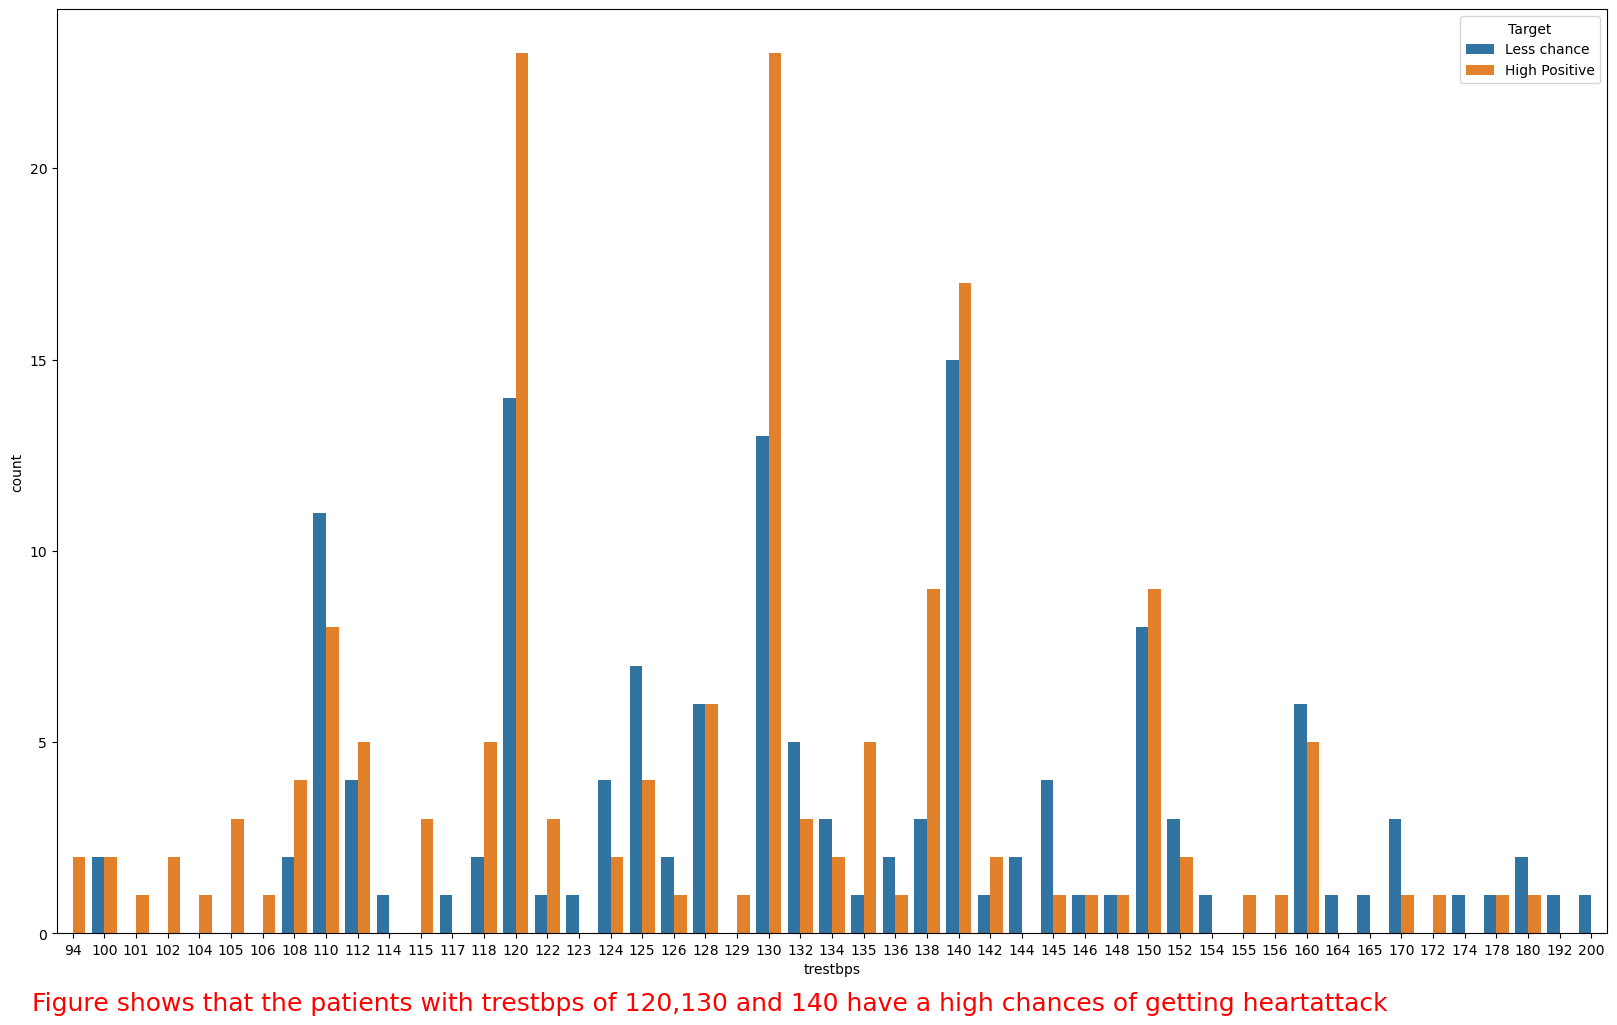

In [253]:
plt.figure (figsize=(20,12))
sns.countplot(x="trestbps", data=df, hue="target")
plt.legend(title="Target", labels=["Less chance", "High Positive"])
plt.text(20,-2, " Figure shows that the patients with trestbps of 120,130 and 140 have a high chances of getting heartattack", fontsize=18,
         color="red", ha="center")
plt.show()

### f. Describe the relationship between cholesterol levels and a target variable

In [256]:
df[["chol", "target"]].corr()

,chol,target
chol,1.000000,-0.081437
target,-0.081437,1.000000


In [266]:
relationship= df[["chol", "target"]].corr().copy()

<Axes: >

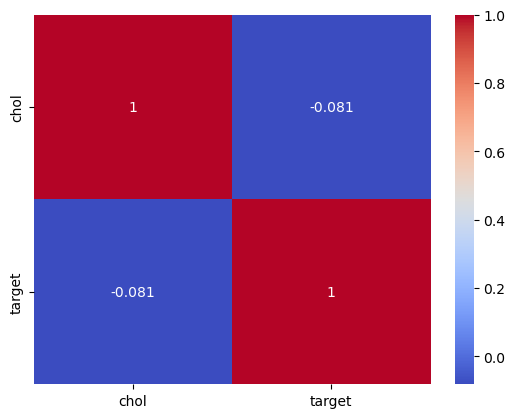

In [267]:
sns.heatmap(relationship, annot=True, cmap="coolwarm")

### The correlation between cholesterol levels and target is negative or in other word it is insignificant. 

<Axes: xlabel='chol', ylabel='target'>

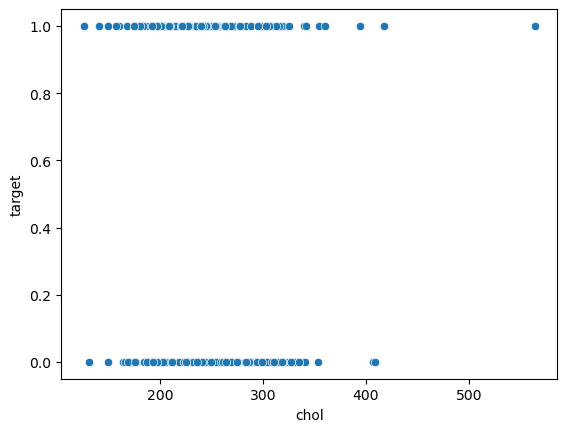

In [259]:
sns.scatterplot(x="chol", y="target", data=df)

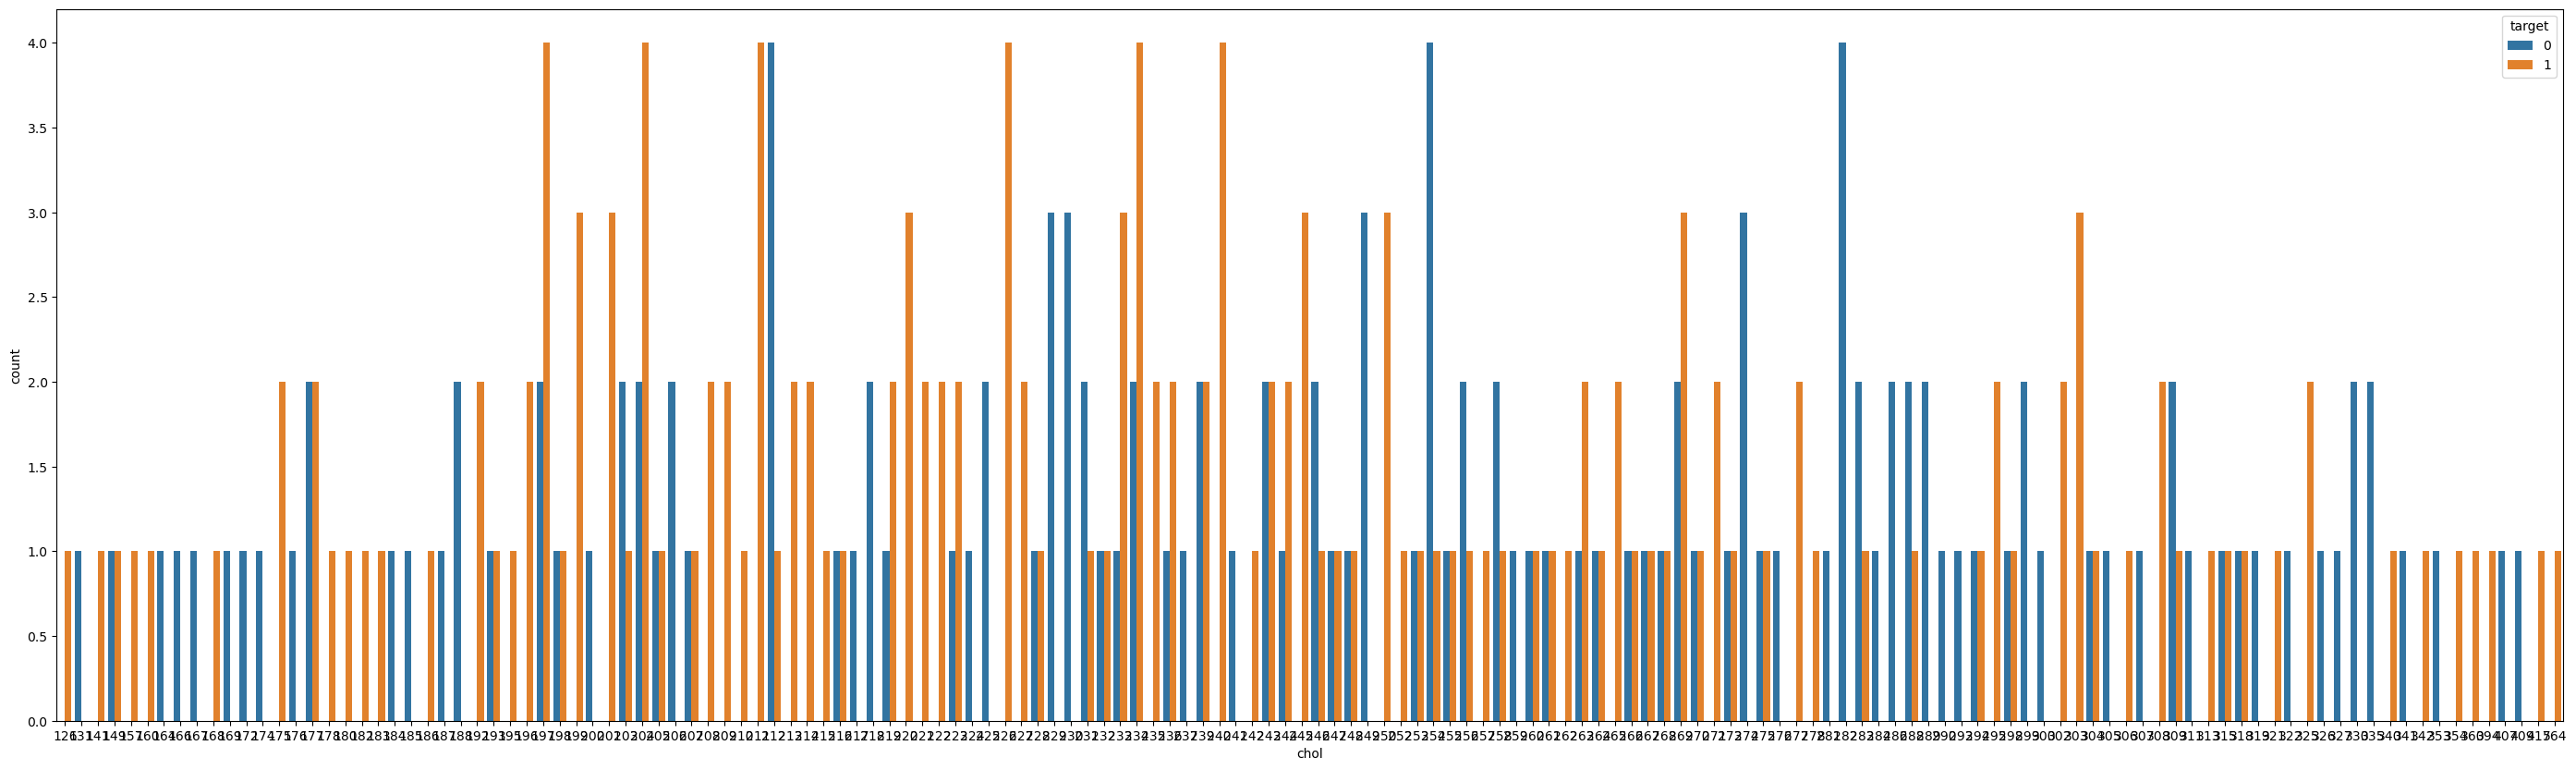

In [280]:
plt.figure (figsize=(35,10))
sns.countplot(x="chol", data=df, hue="target")
plt.show()

### Above graph and correlation identify that it is hard to measure the relationship between target variable and colestoral. Dataframe id not sufficient to see any relationship between the varaible

### 2.g. State what relationship exists between peak exercising and the occurrence of a heart attack

1. oldpeak = ST depression induced by exercise relative to rest
2. exang = Exercise induced angina (1 = yes; 0 = no)
3. slope = Slope of the peak exercise ST segment

<Axes: xlabel='oldpeak', ylabel='count'>

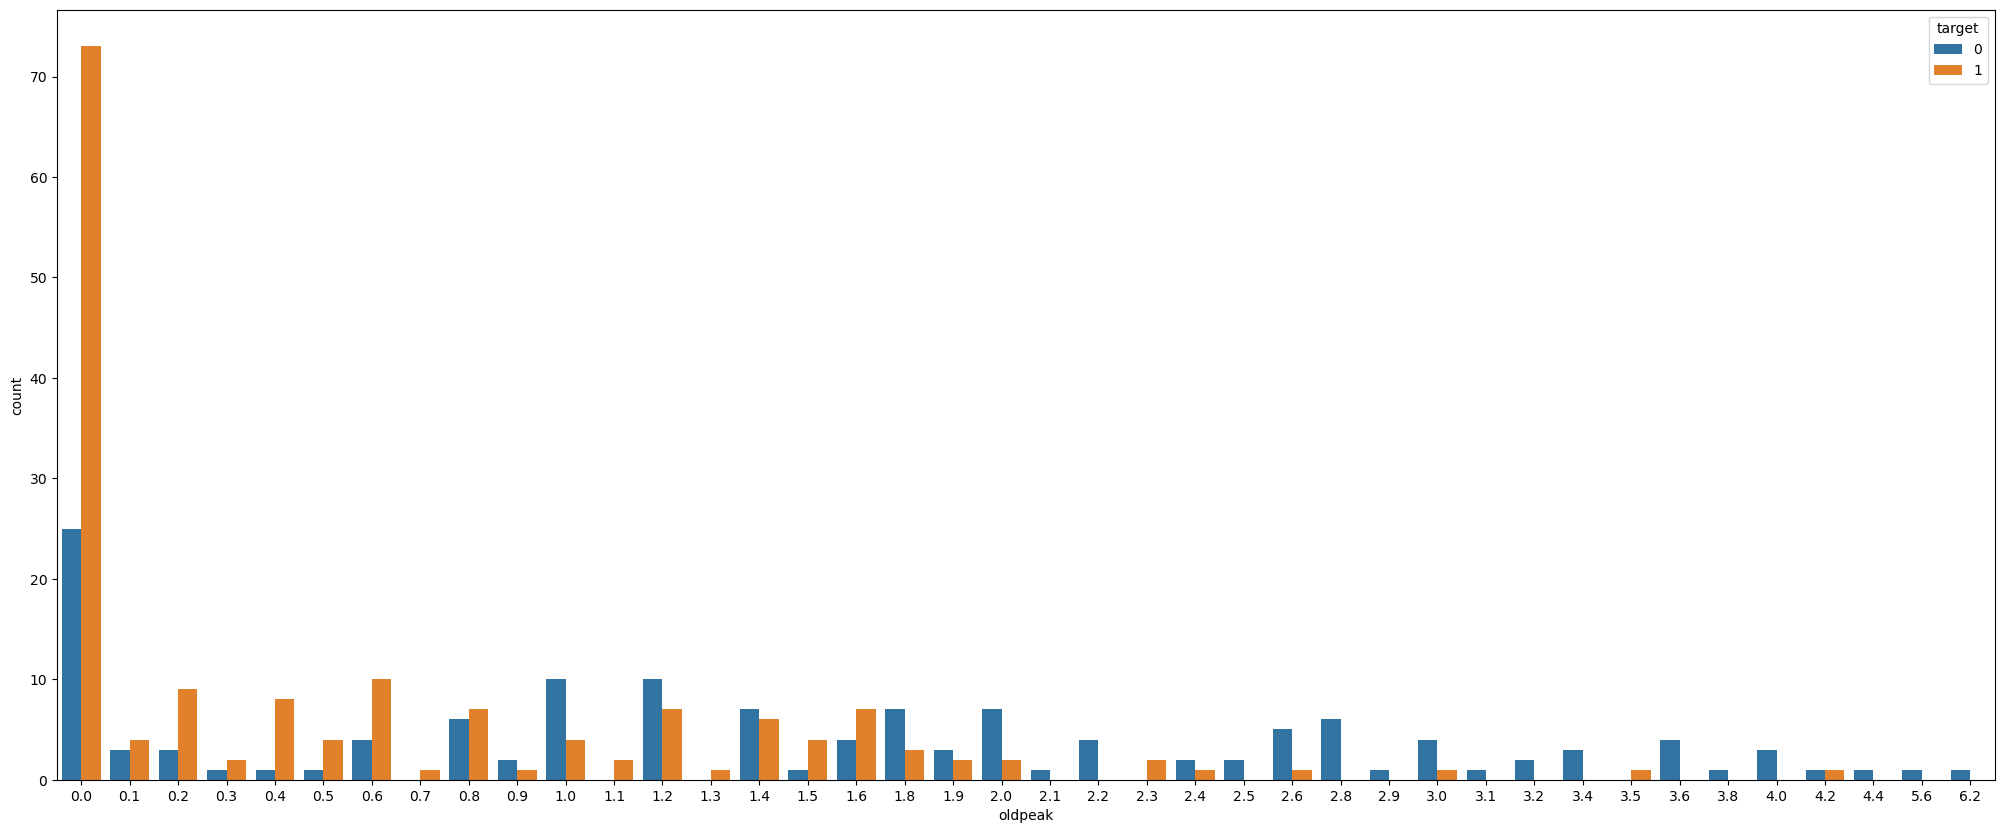

In [284]:
plt.figure(figsize=(25,10))
sns.countplot(x="oldpeak", data=df, hue="target")

<Axes: xlabel='slope', ylabel='count'>

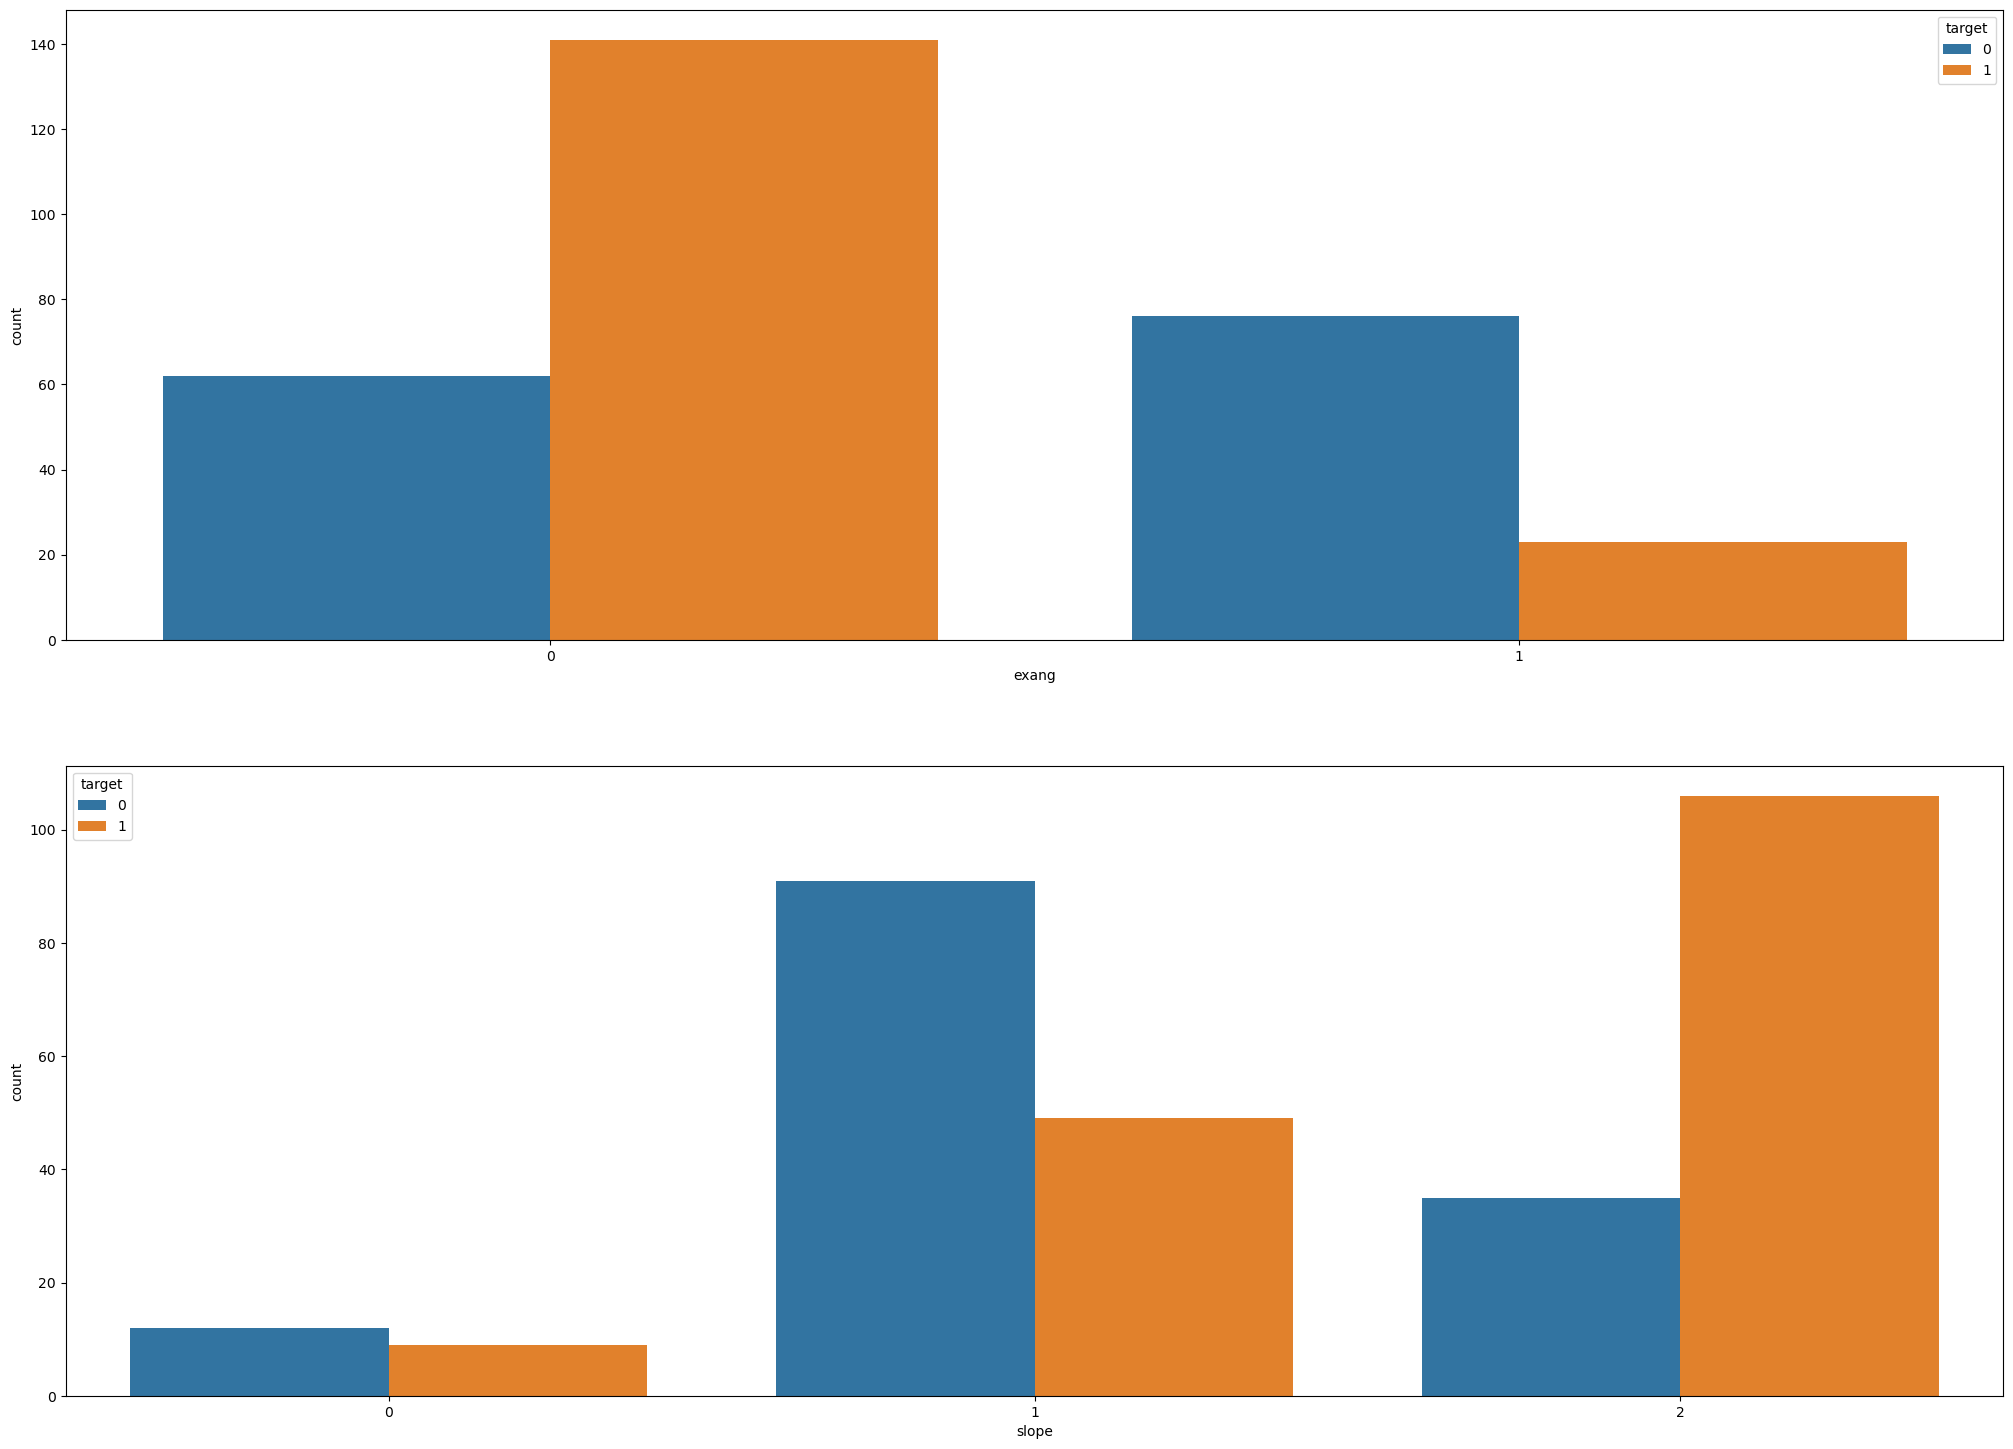

In [288]:
plt.figure (figsize=(25,18))
plt.subplot(2,1,1)
sns.countplot(x="exang", data=df, hue="target")
plt.subplot(2,1,2)
sns.countplot(x="slope", data=df, hue="target")

The above graph shows the followings: 
1. oldpeak: The less the value of oldpeak, the likely to get the heartattack
2. Exang: when the Exang value is 0 then the heartattach rate is increasing, Figure shows that the likely chances of hearattach incresed when Exercise induced angina is less (0). The patients without exercise are likely to get heartattack more.
3. Slope: When the slope value- ST increases the chances of heartattack is higher. 

### h. Check if thalassemia is a major cause of CVD

<Axes: xlabel='thal', ylabel='count'>

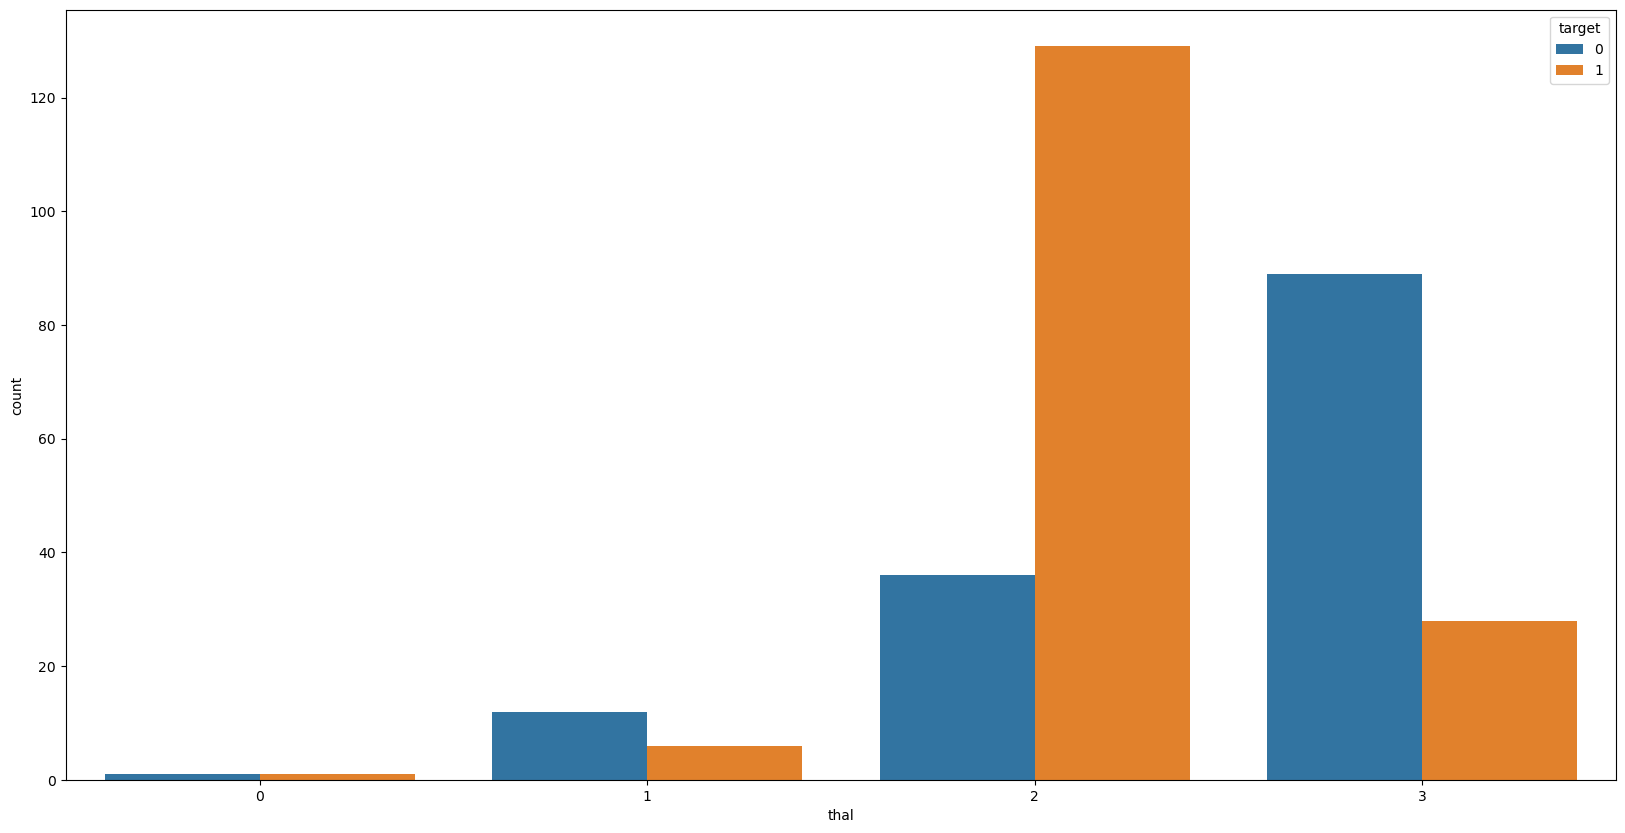

In [301]:
plt.figure (figsize=(20,10))
sns.countplot(x="thal", data=df, hue="target")


### Patients with thal value of 2 is likely to be in a danger heartattack zone.

In [304]:
df[["thal", "target"]].corr()

,thal,target
thal,1.000000,-0.343101
target,-0.343101,1.000000


### Above relationship indicates that the corelationship between thal and target is very minimum so we can say that it is not a majot cause

### i. List how the other factors determine the occurrence of CVD


In [309]:
col_order=['target','age','cp','fbs', 'restecg', 'slope', 'ca', 'thal',  'exang', 'oldpeak', 'trestbps', 
               'chol','thalach','sex']
df=df.reindex(columns=col_order).copy()

<Axes: >

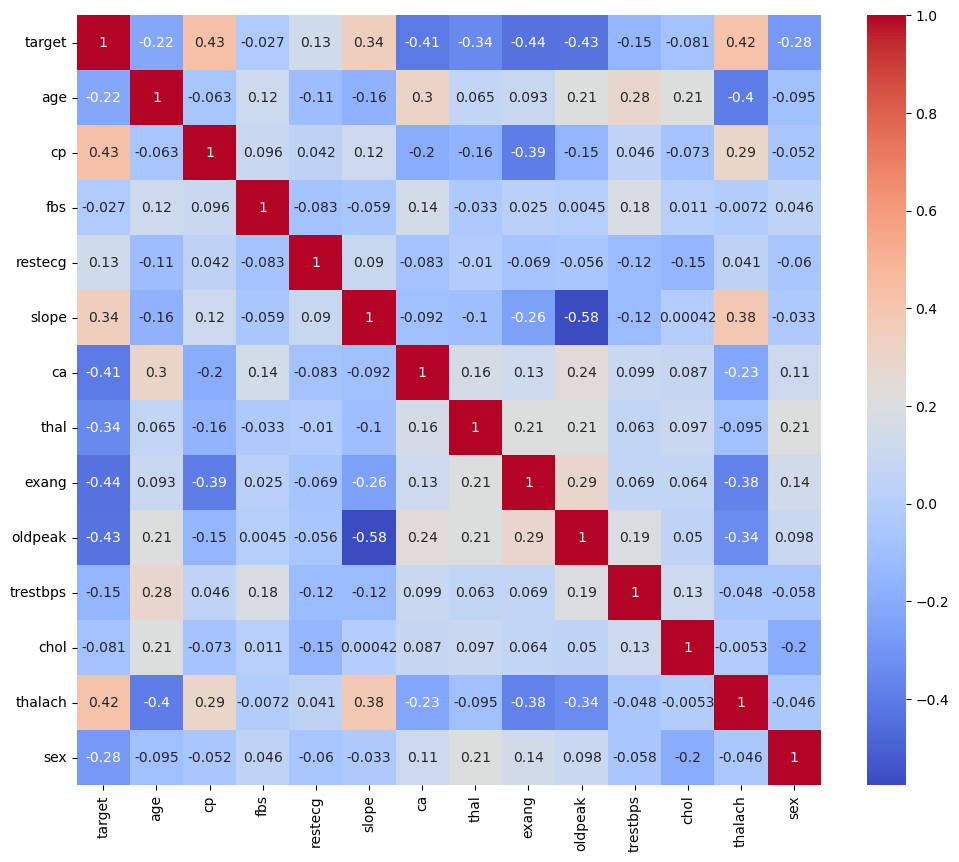

In [311]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

The Above heatmap with a target varaibles gives the following informations:
1. CP(Chect Pain) and Thalach (Heart rate) are the main reason of CVD occrance, however slope (Peak exercise) is also a factor of CVD. 
2. Similar pattern of corealationship between the CP, slope and Thalach can be observed. 
3. The chances of CVD doesn't only relate to one case so it can happen with one or many reasons.
4. Hoever we can also observe some posive corelation between target variable and Resting electrocardiographic results
5. The dataset needs more investigation, however some variable can be ruled out with very less corelation like fbs and chol.

### j. Use a pair plot to understand the relationship between all the given variables

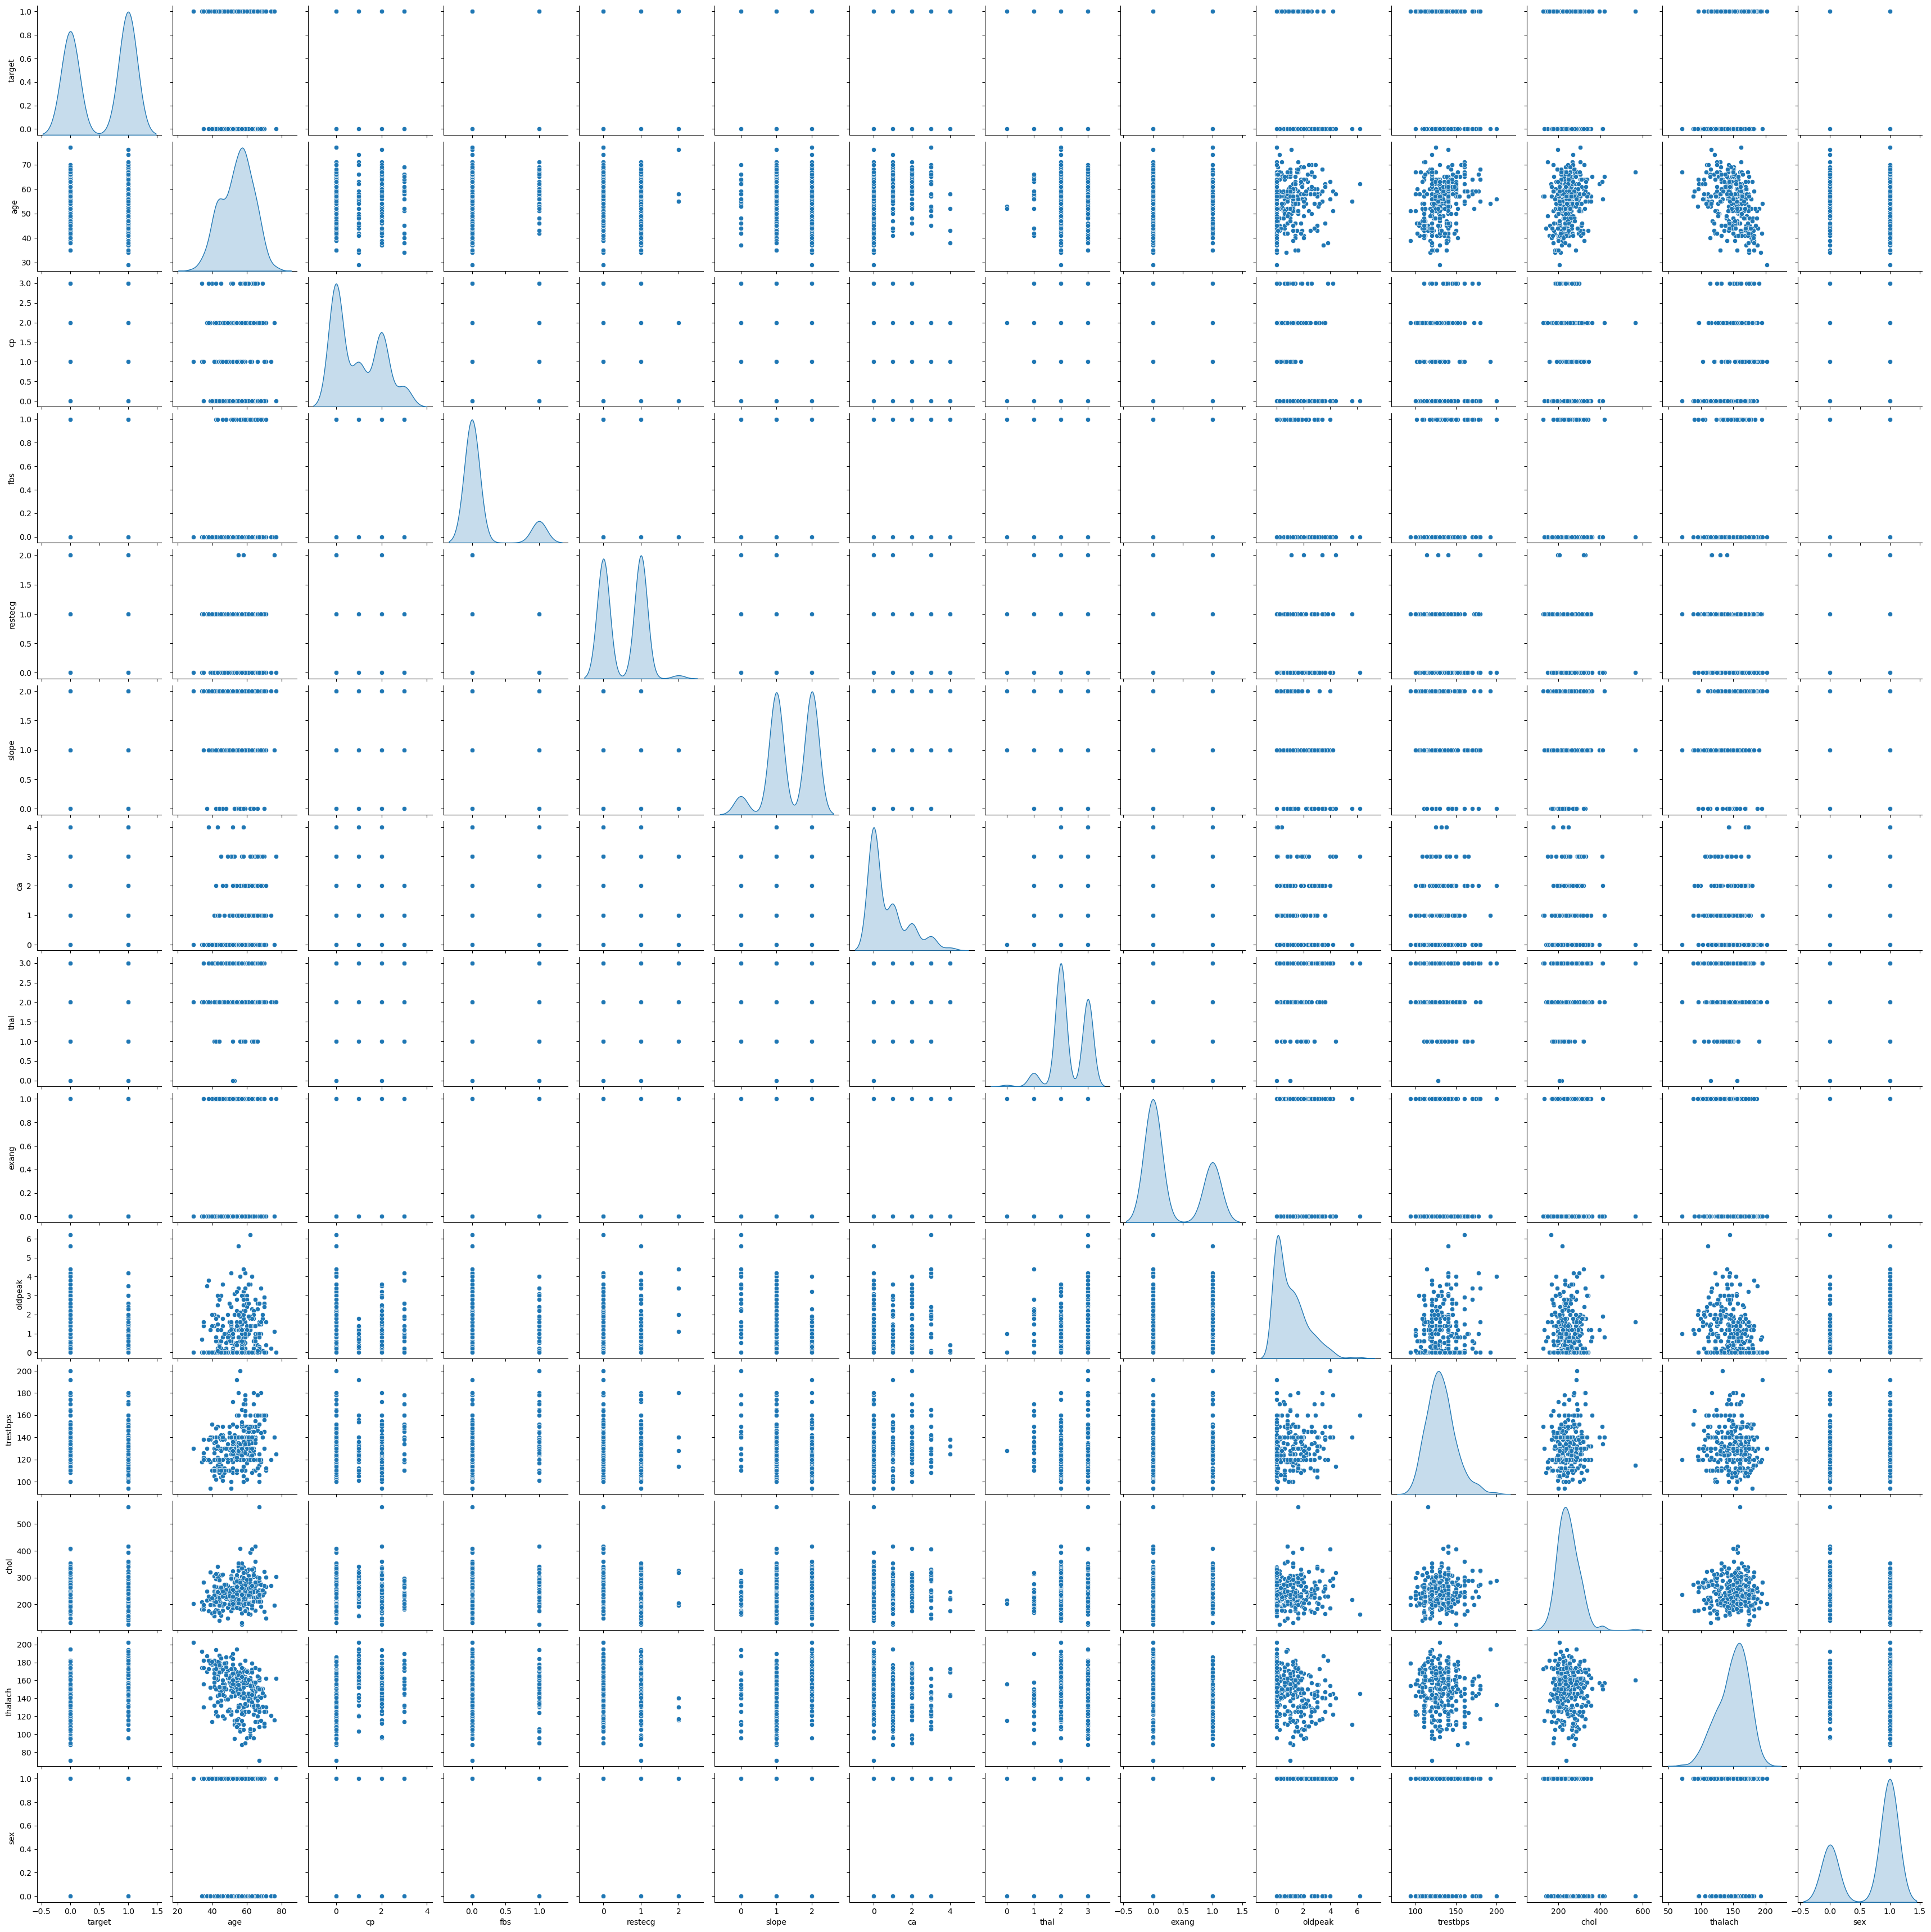

In [314]:
sns.pairplot(df, diag_kind="kde")
plt.show()

### The observation is very hard to predict any information. The other plots give more clear information than pairplot. Some of the observation is to see the scatterplot between variables and see the corelations. It is best to divide the dataset into 2 and do the pairplot again to have more clear information. 

In [315]:
df_num_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [316]:
df_cat_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [317]:
col_order=['target','age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df1=df.reindex(columns=col_order).copy()

In [318]:
col_order_1= ['target','sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df2=df.reindex(columns=col_order_1).copy()

In [319]:
high_corealated_column= ["target", "ca", "thalach", "slope"]
df3= df.reindex(columns=high_corealated_column).copy()

In [320]:
df1.columns

Index(['target', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [321]:
df2.columns

Index(['target', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca',
       'thal'],
      dtype='object')

In [323]:
df3.columns

Index(['target', 'ca', 'thalach', 'slope'], dtype='object')

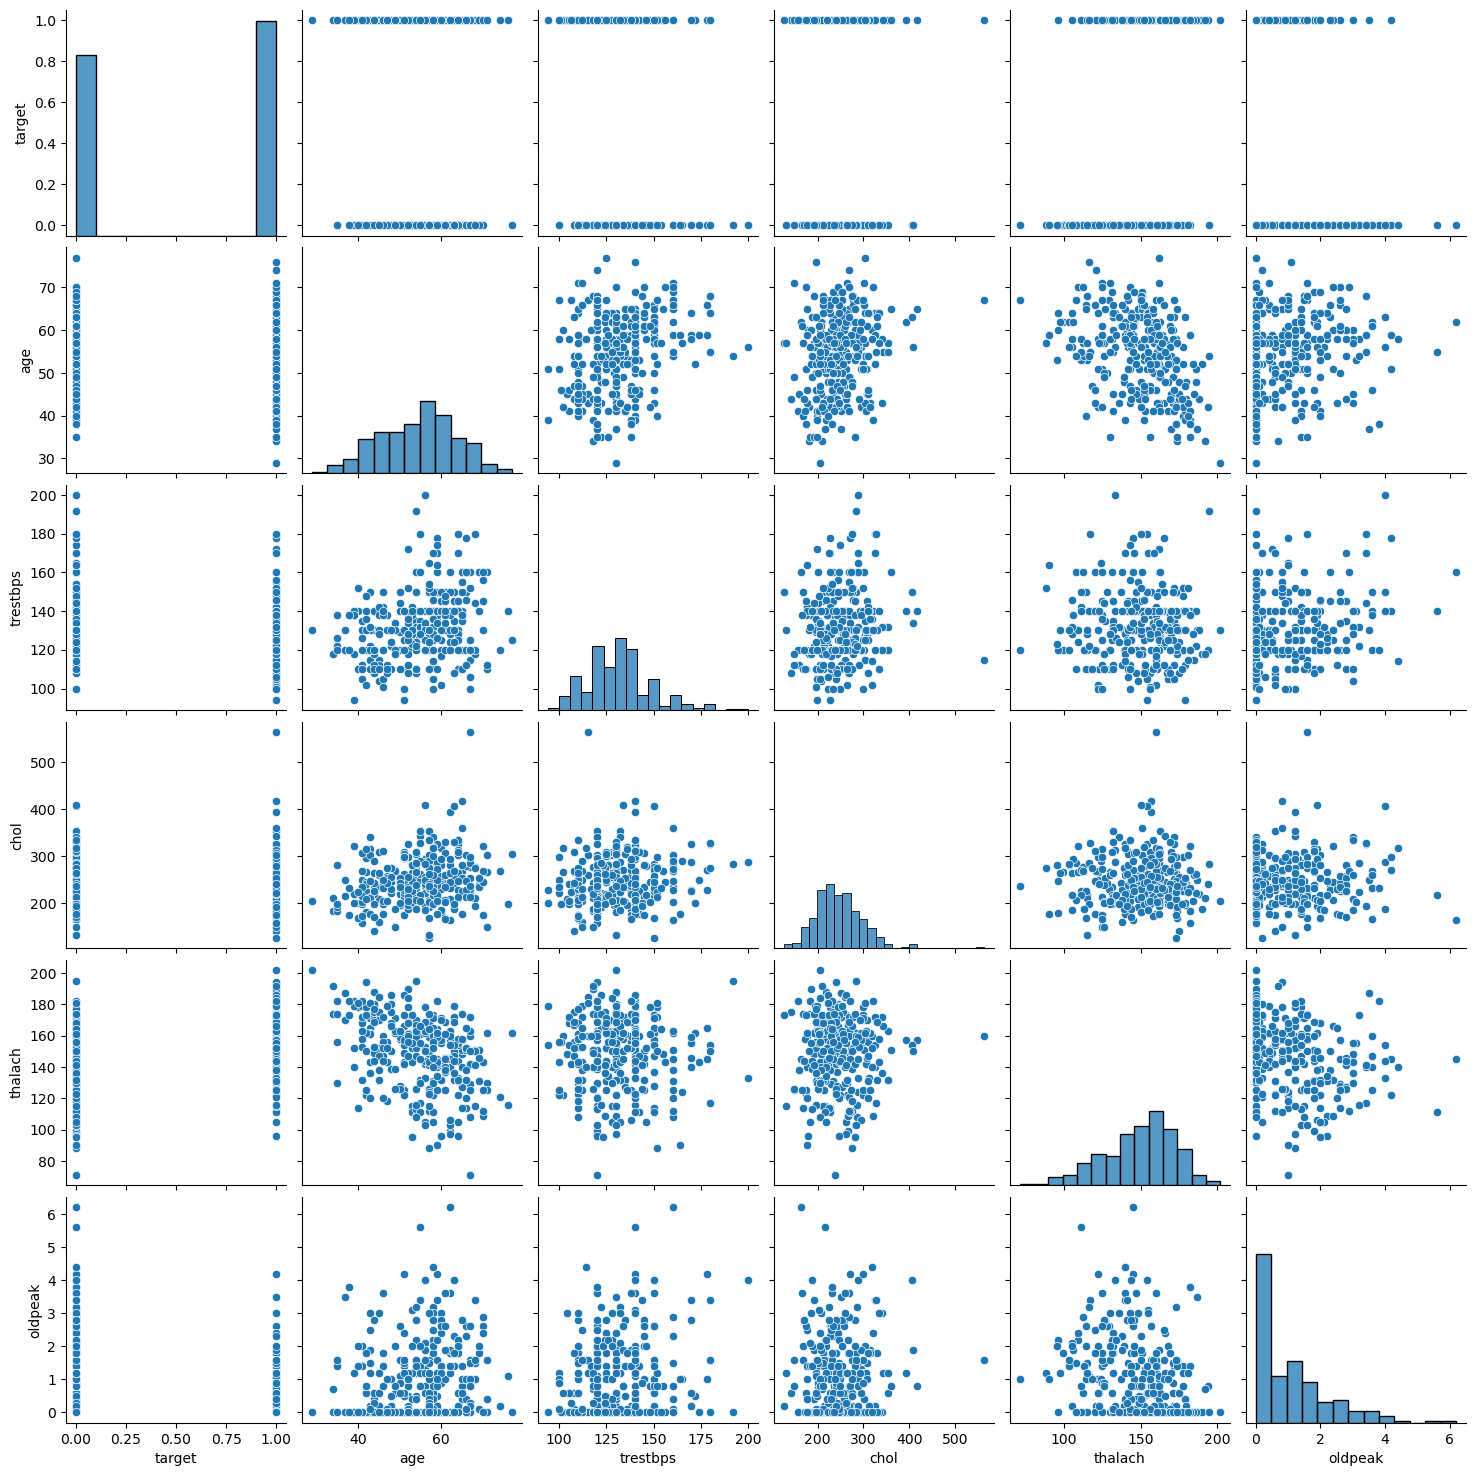

In [324]:
sns.pairplot(df1)
plt.show()

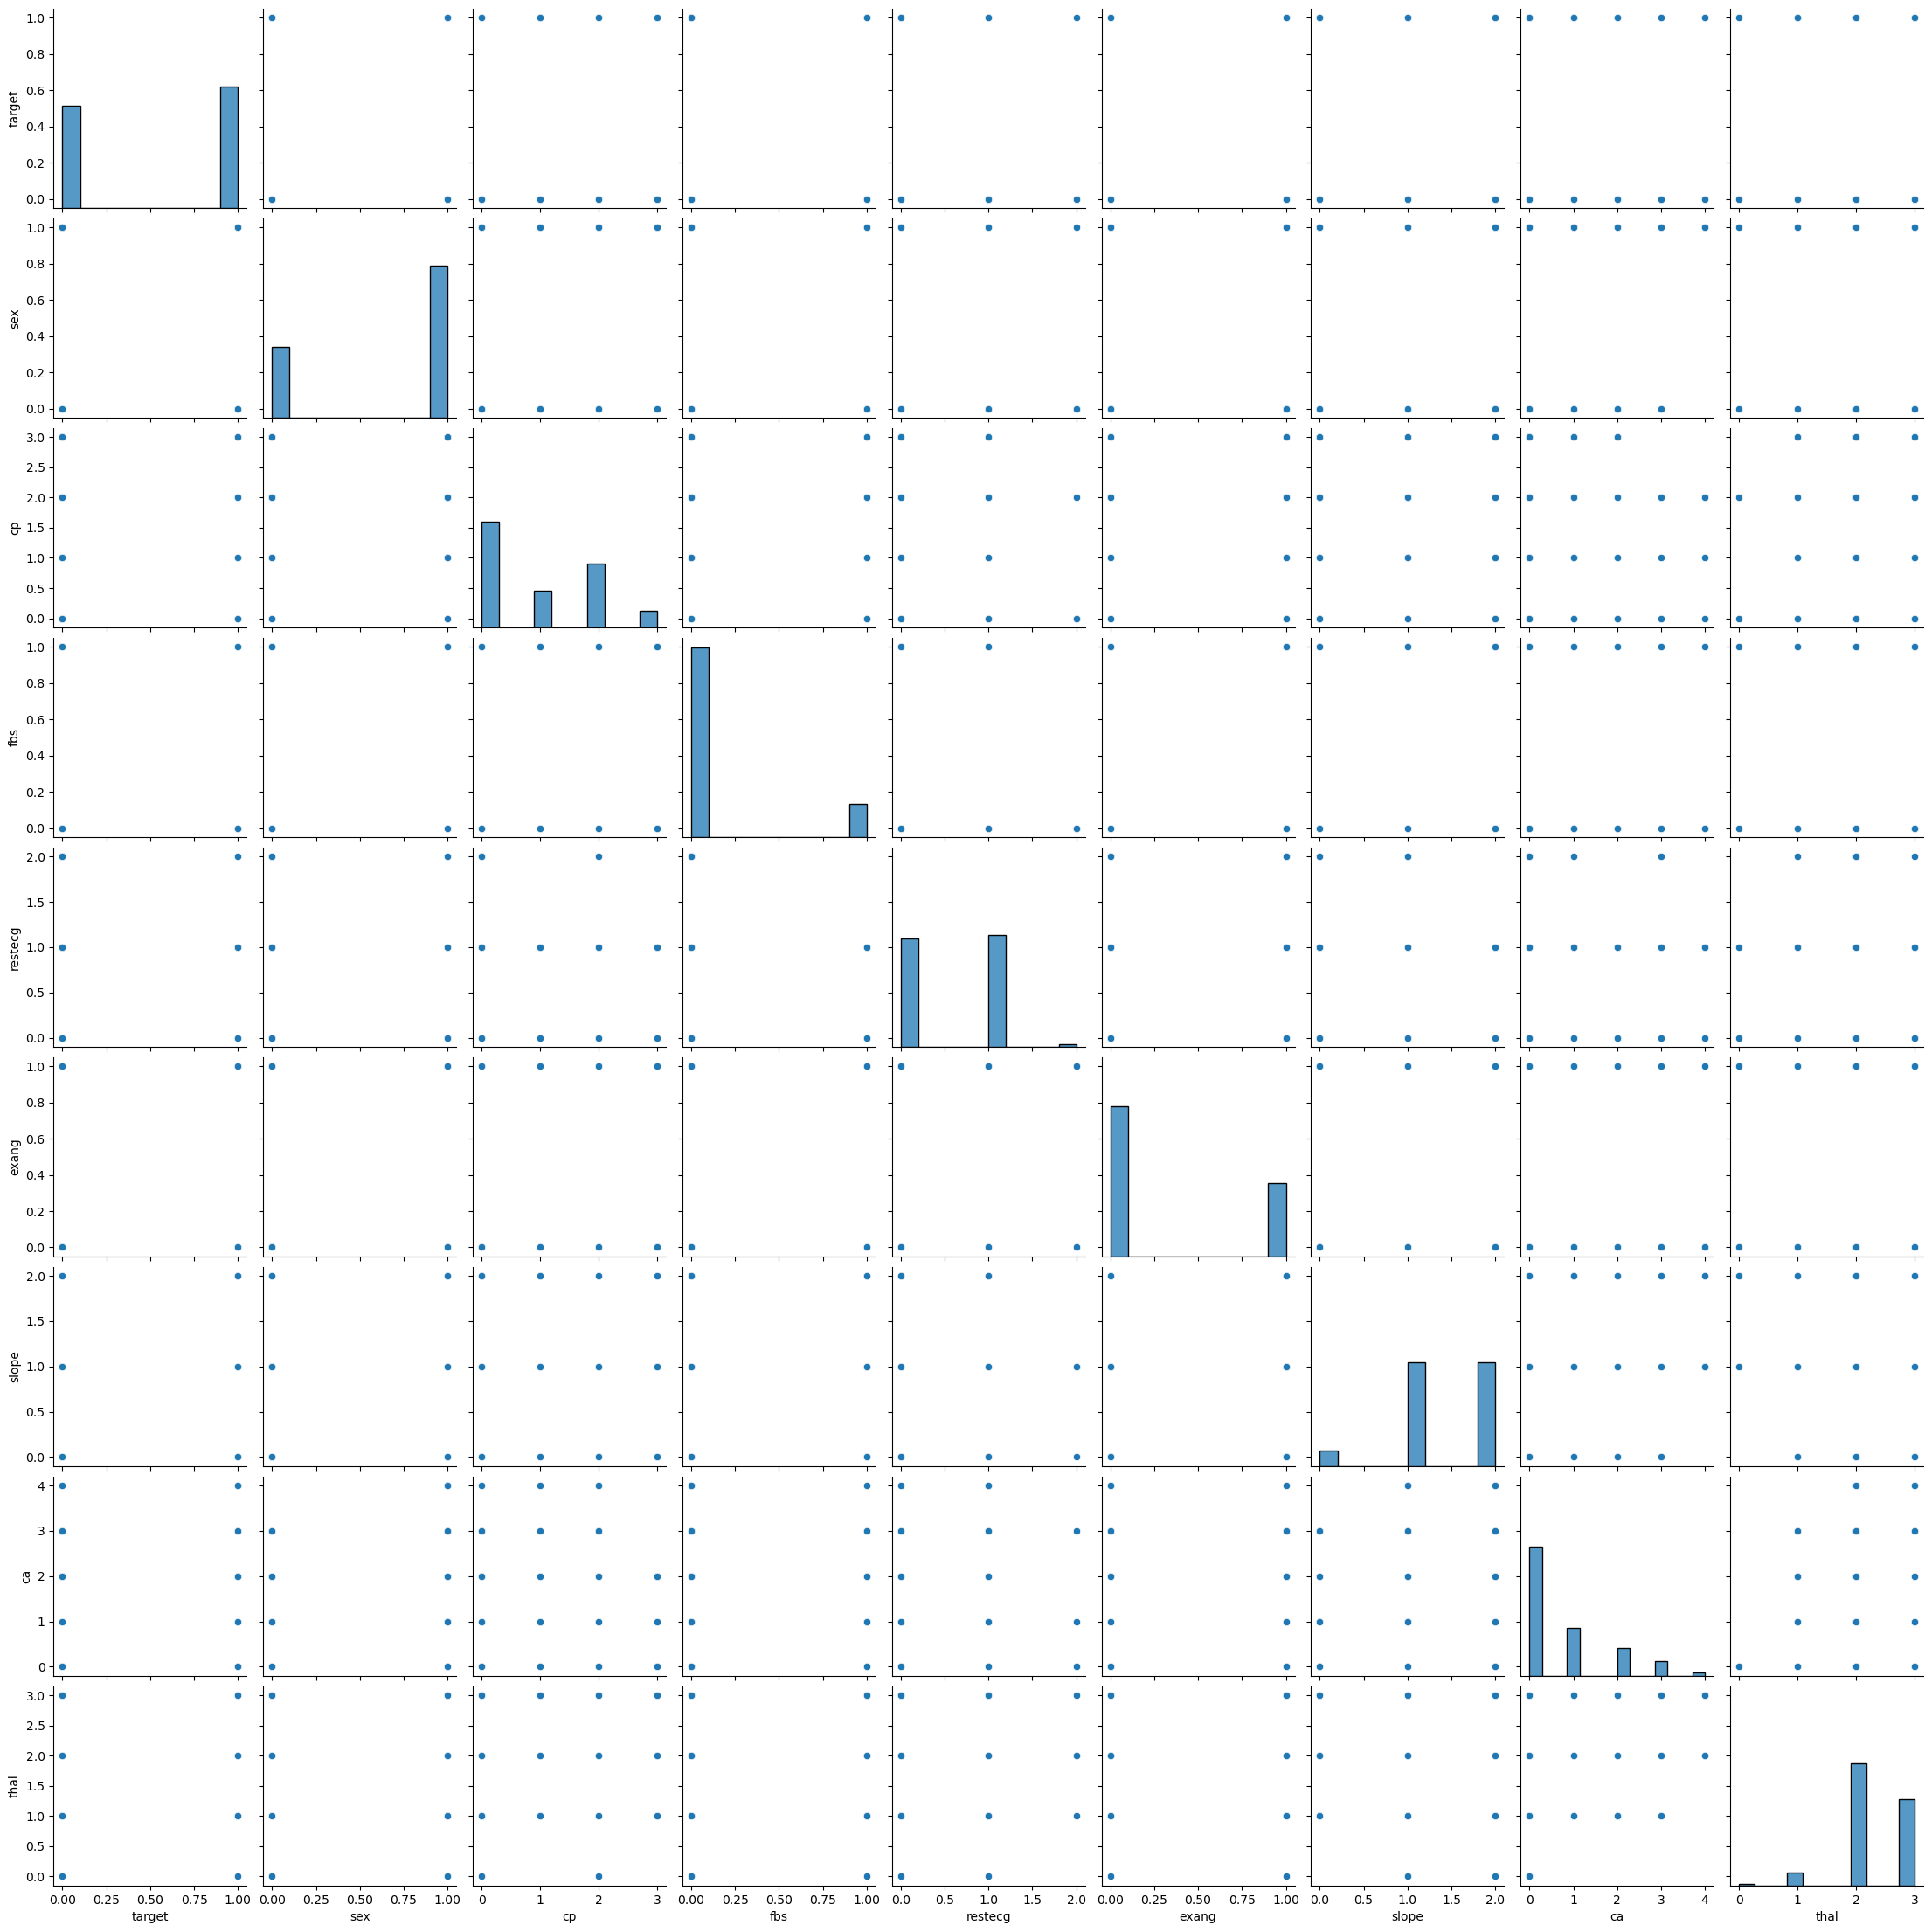

In [325]:
sns.pairplot(df2)
plt.show()

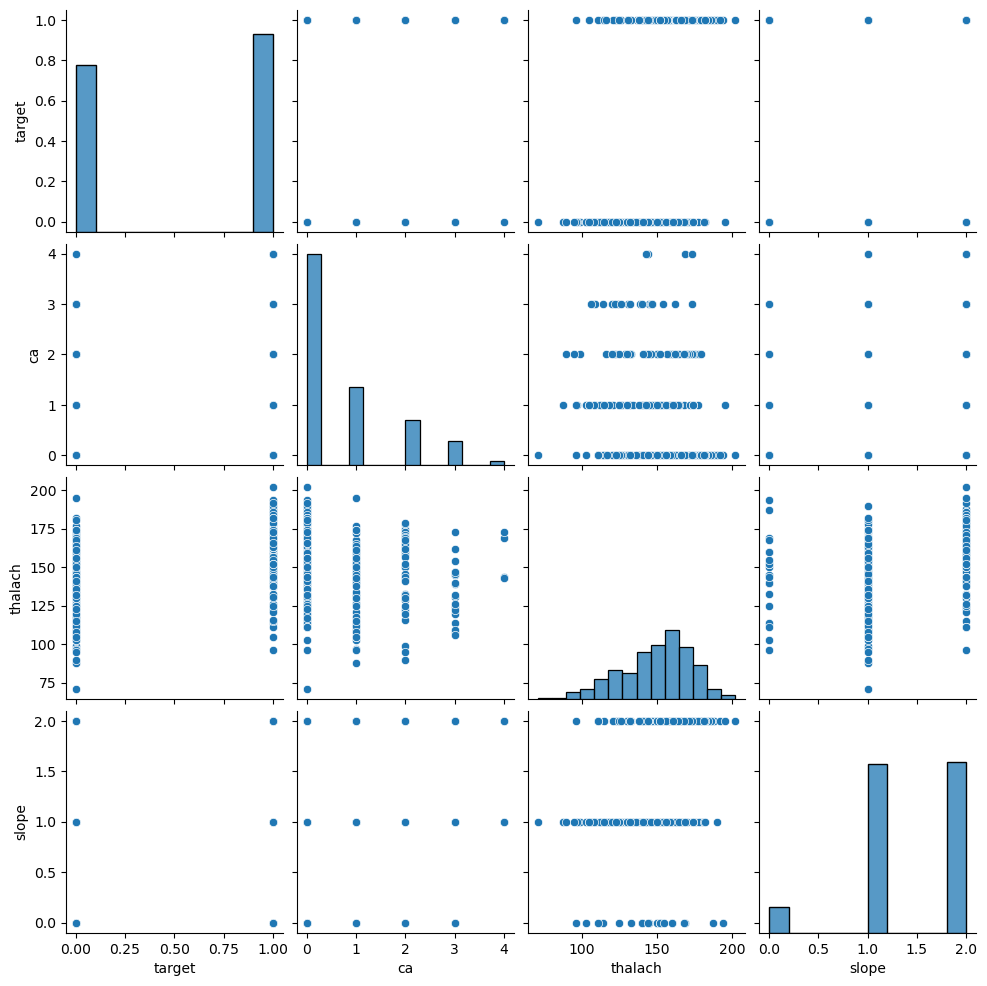

In [326]:
sns.pairplot(df3)
plt.show()

### Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

#### Before performing any ML model, we need to prepare the data for modeling. The first observation should be identifying any possible outliers, dropping columns that has no relationship with target variable. 

In [328]:
# Dropping "fbs" & "chol"
df.drop(["fbs", "chol"], axis=1, inplace=True)

In [476]:
df[df["thalach"]>195]

,target,age,cp,restecg,slope,ca,thal,exang,oldpeak,trestbps,thalach,sex


In [463]:
df.head()

,target,age,cp,restecg,slope,ca,thal,exang,oldpeak,trestbps,thalach,sex
0,1,63,3,0,0,0,1,0,2.3,145.0,150.0,1
1,1,37,2,1,0,0,2,0,3.5,130.0,187.0,1
2,1,41,1,0,2,0,2,0,1.4,130.0,172.0,0
3,1,56,1,1,2,0,2,0,0.8,120.0,178.0,1
4,1,57,0,1,2,0,2,1,0.6,120.0,163.0,0


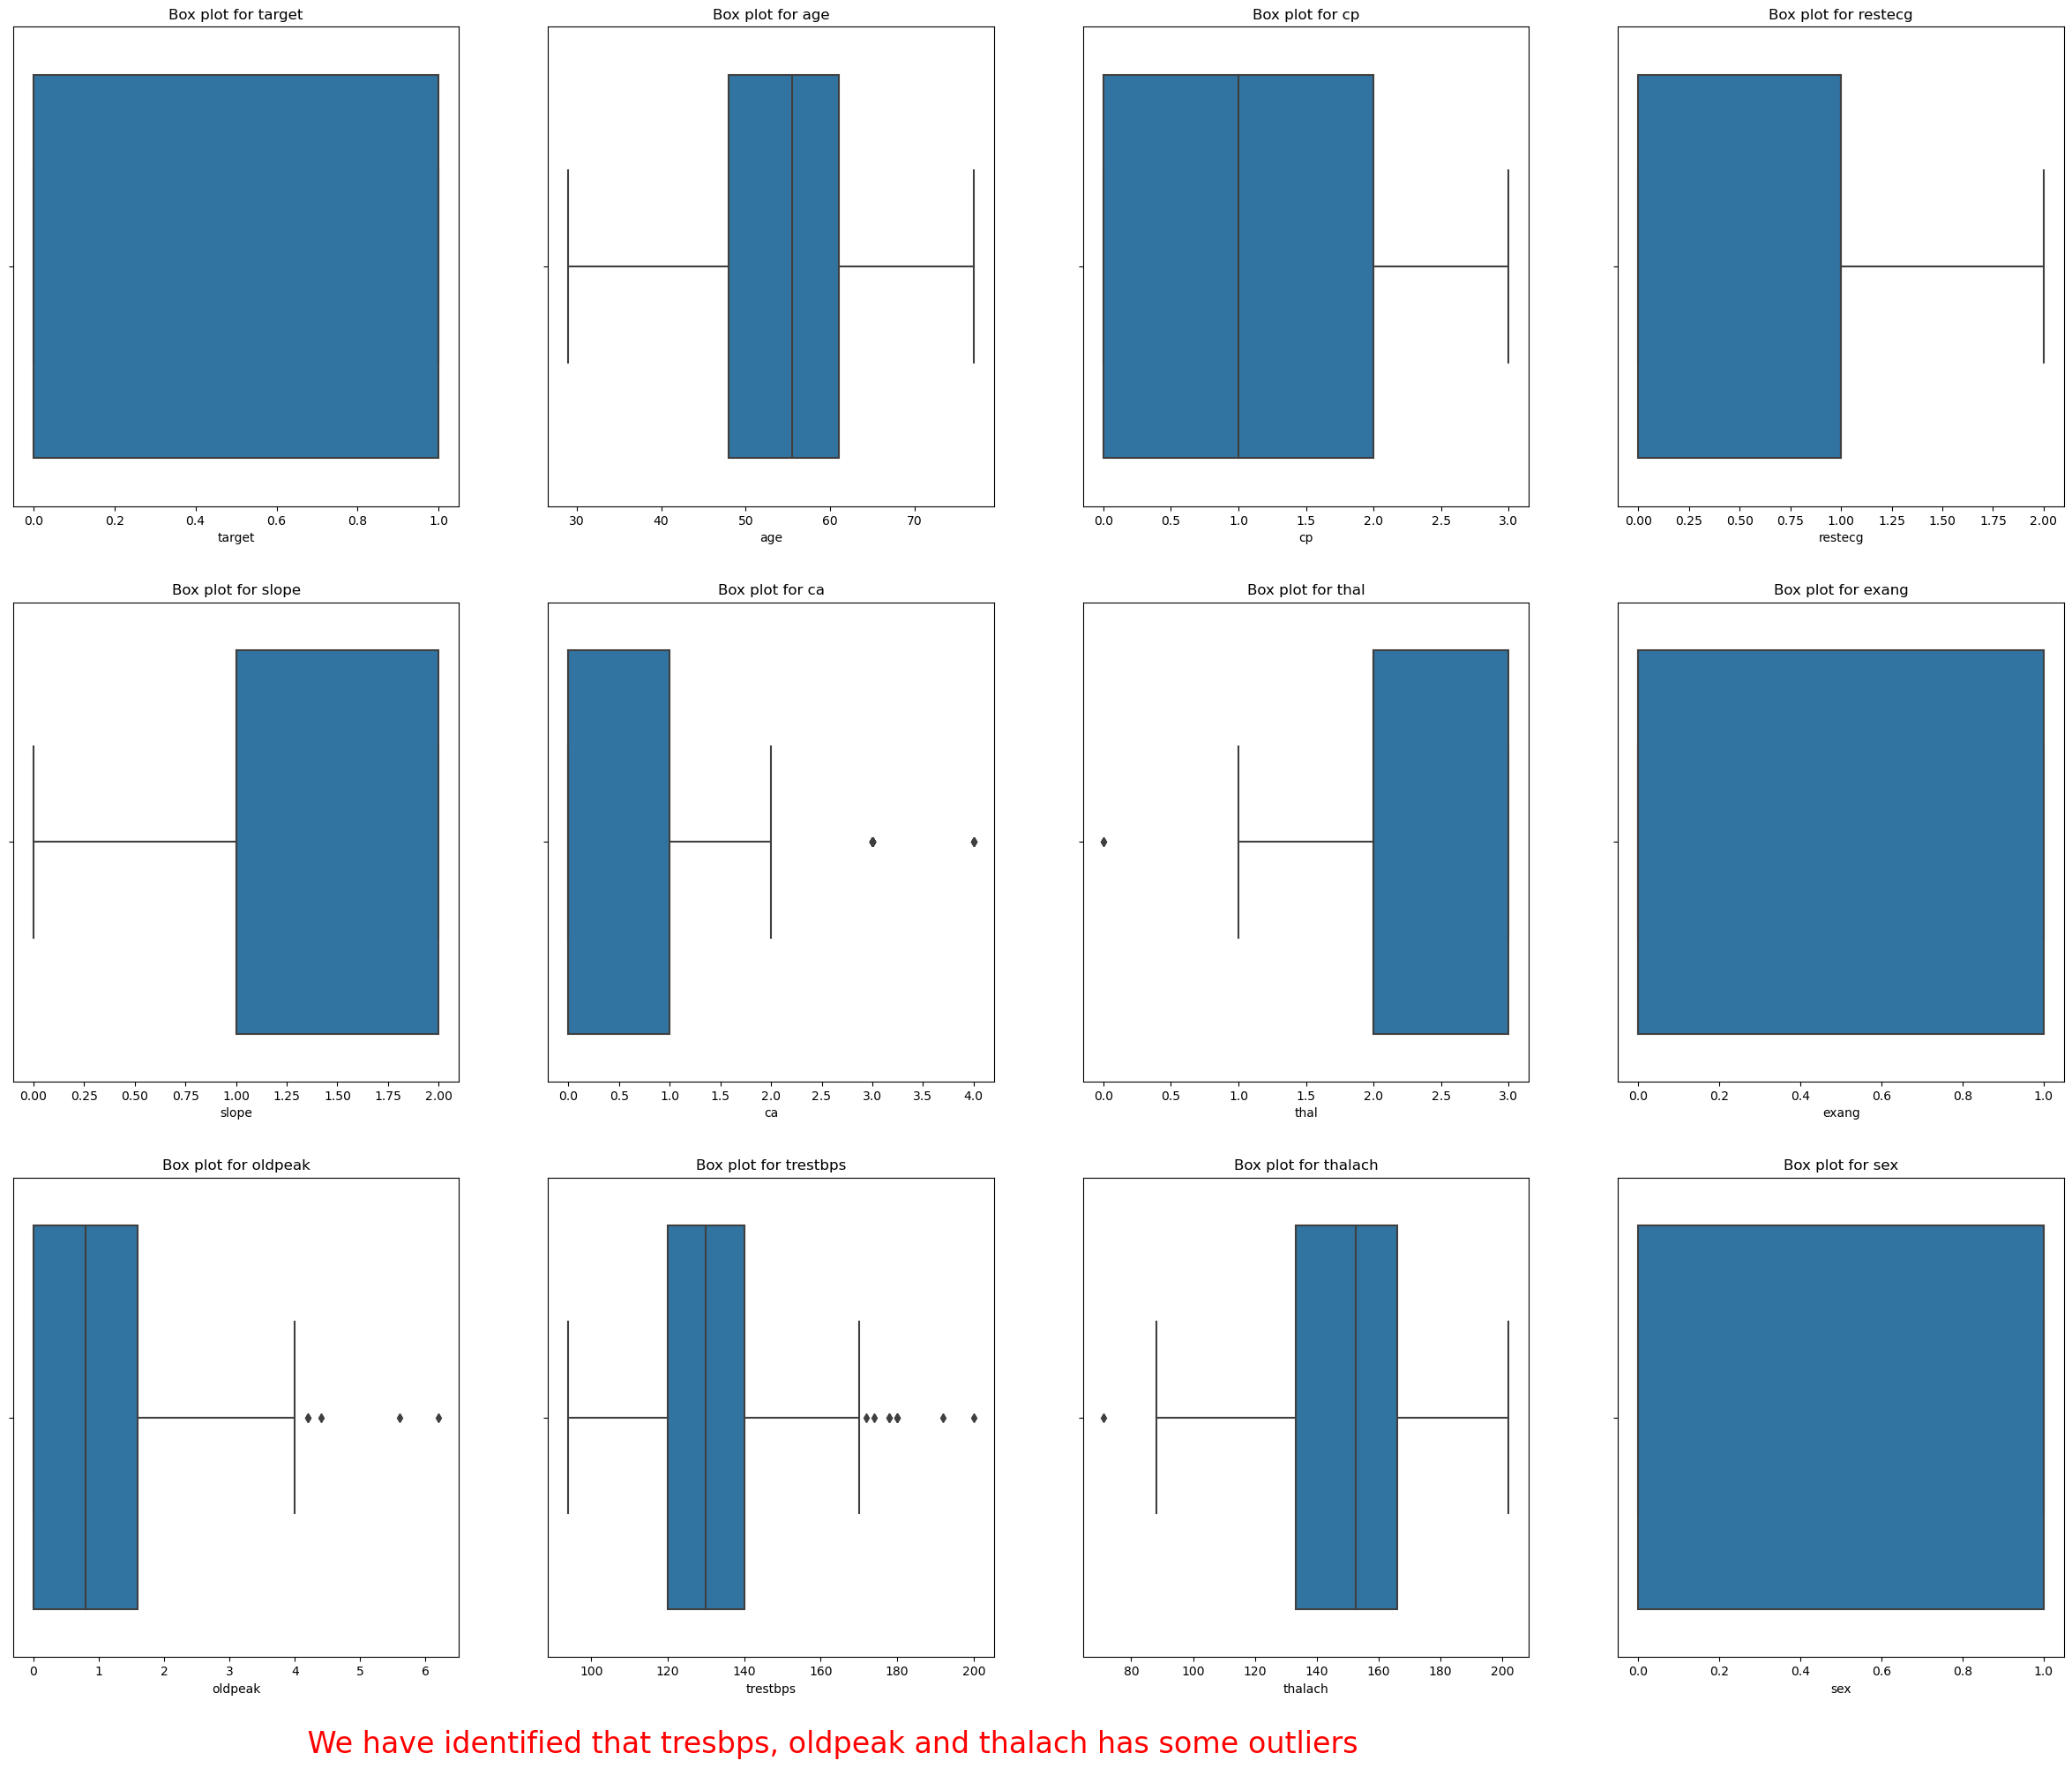

In [372]:
# Now perform a box plot to identify any possible outliers
plt.figure(figsize=(30,24))
for i, column in enumerate(df.columns, start=1):
    plt.subplot(3,4,i)
    sns.boxplot(x=column, data=df)
    plt.title(f"Box plot for {column}")
plt.text(-2,0.7," We have identified that tresbps, oldpeak and thalach has some outliers", fontsize=24, ha="center", color="red")    
plt.show()


In [364]:
df[["ca","thal", "trestbps", "oldpeak"]].nunique()

ca           5
thal         4
trestbps    49
oldpeak     40
dtype: int64

<Axes: xlabel='thalach', ylabel='Density'>

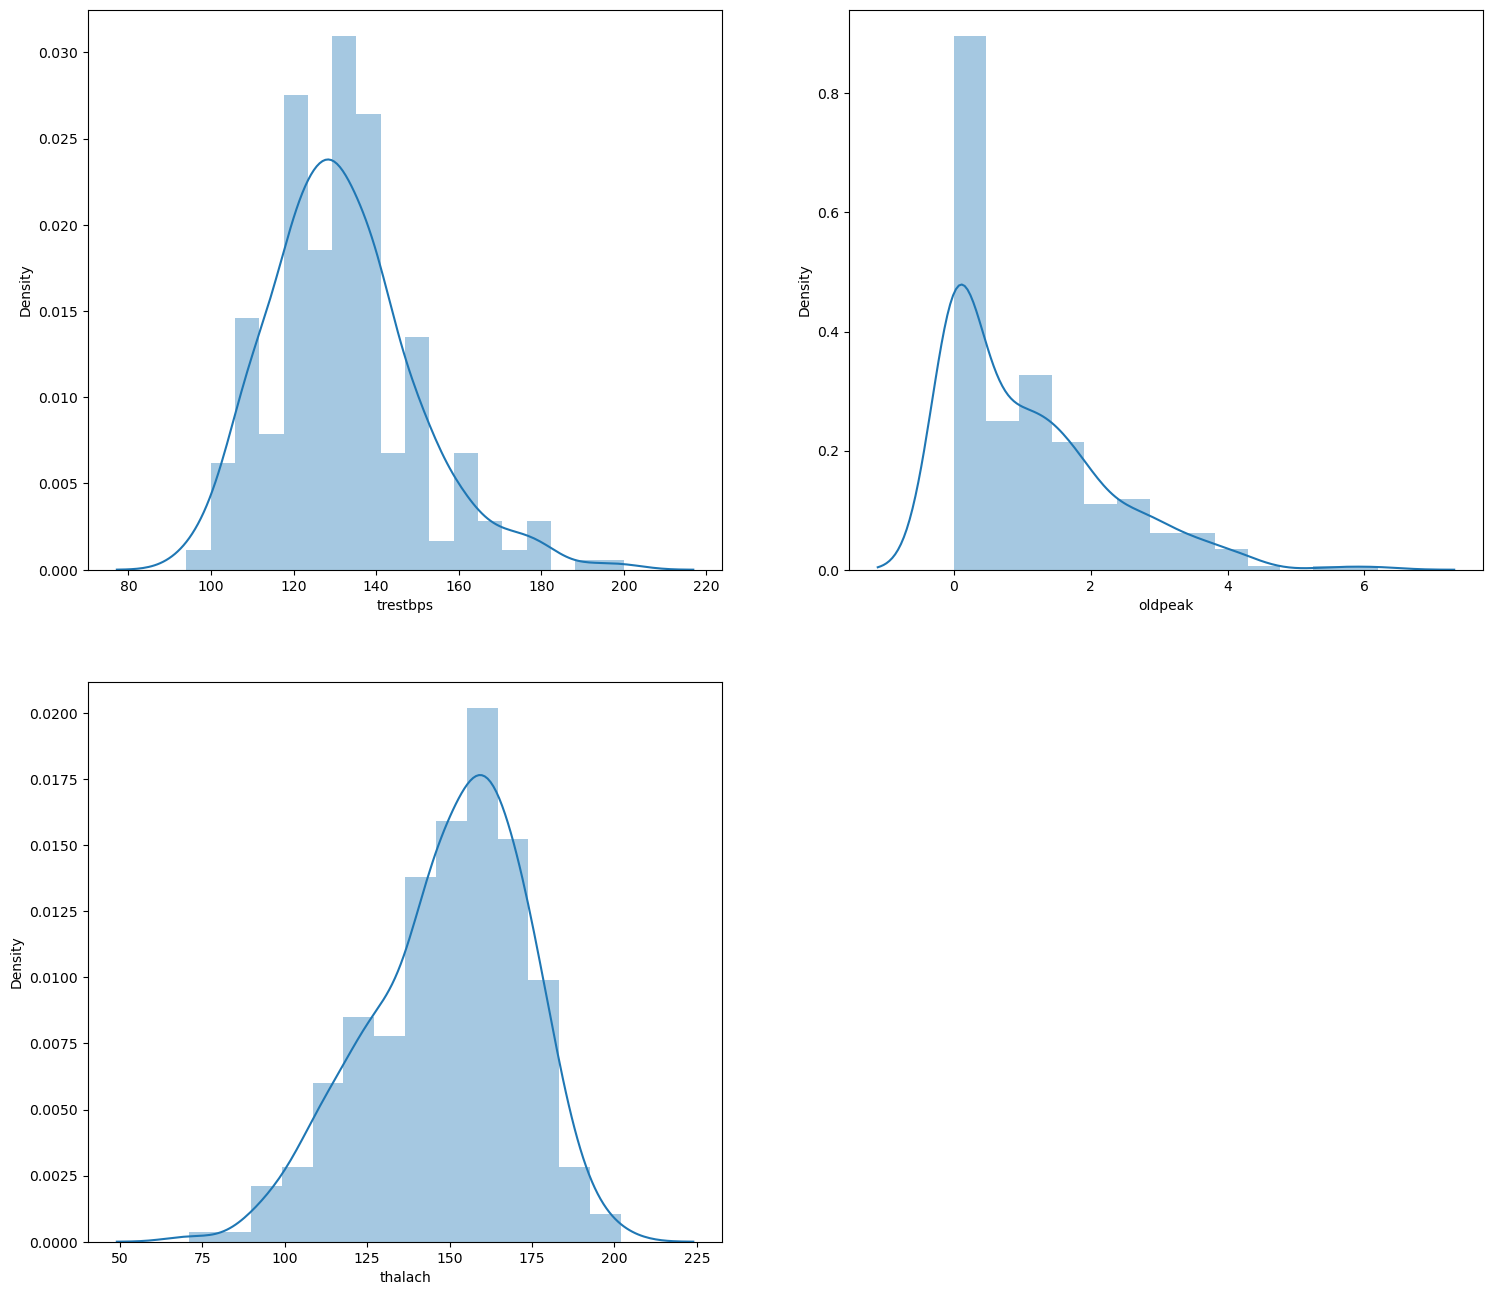

In [373]:
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
sns.distplot(df["trestbps"])
plt.subplot(2,2,2)
sns.distplot(df["oldpeak"])
plt.subplot(2,2,3)
sns.distplot(df["thalach"])

In [441]:
df["trestbps"].mean()

131.4949883835117

In [442]:
df["trestbps"].median()

130.0

In [543]:
df["oldpeak"].mode()

0    0.0
Name: oldpeak, dtype: float64

In [536]:
df["oldpeak"].mean()

1.0430463576158941

In [445]:
df["thalach"].mean()

149.39592561729748

In [446]:
df["thalach"].median()

152.0

In [447]:
from scipy import stats


In [477]:
outliers_treatment=["trestbps","oldpeak","thalach" ]
num_outliers={}
threshold=2
for var_name in outliers_treatment:
    z_scores=stats.zscore(df[var_name])
    outliers= (z_scores < -threshold) | (z_scores > threshold)
    num_outliers[var_name]=sum(outliers)
for var_name, num in num_outliers.items():
    print(f"Number of outliers in {var_name}: {num}")  
    

Number of outliers in trestbps: 15
Number of outliers in oldpeak: 17
Number of outliers in thalach: 11


In [522]:
# Treating Outliers using IQR
Q1=df["trestbps"].quantile(0.25)
Q3=df["trestbps"].quantile(0.75)
IQR=Q3-Q1
threshold=1.5
outliers=Q3+1.5*(IQR)



In [526]:
df[df.trestbps>outliers]

,target,age,cp,restecg,slope,ca,thal,exang,oldpeak,trestbps,thalach,sex
8,1,52,2,1,2,0,3,0,0.5,172.0,162.0,1
101,1,59,3,0,0,0,3,0,4.2,178.0,145.0,1
110,1,64,0,1,2,0,2,1,0.0,180.0,154.0,0
203,0,68,2,0,1,0,3,1,1.6,180.0,150.0,1
223,0,56,0,0,0,2,3,1,4.0,200.0,133.0,0
241,0,59,0,1,1,0,2,1,0.0,174.0,143.0,0
248,0,54,1,0,2,1,3,0,0.0,192.0,195.0,1
260,0,66,0,1,1,2,3,1,1.0,178.0,165.0,0
266,0,55,0,2,1,0,2,1,3.4,180.0,117.0,0


In [527]:
trestbps_index=df[df.trestbps>outliers].index

In [528]:
trestbps_index

Int64Index([8, 101, 110, 203, 223, 241, 248, 260, 266], dtype='int64')

In [531]:
df.loc[trestbps_index, "trestbps"]= df["trestbps"].mean()

In [533]:
df.loc[trestbps_index, "trestbps"]

8      131.499795
101    131.499795
110    131.499795
203    131.499795
223    131.499795
241    131.499795
248    131.499795
260    131.499795
266    131.499795
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps'>

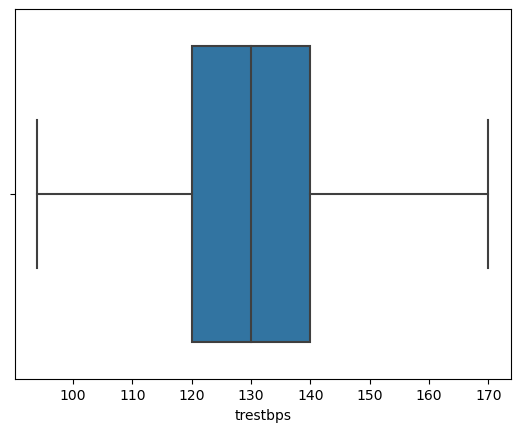

In [534]:
sns.boxplot(x="trestbps", data=df)

<Axes: xlabel='trestbps', ylabel='Density'>

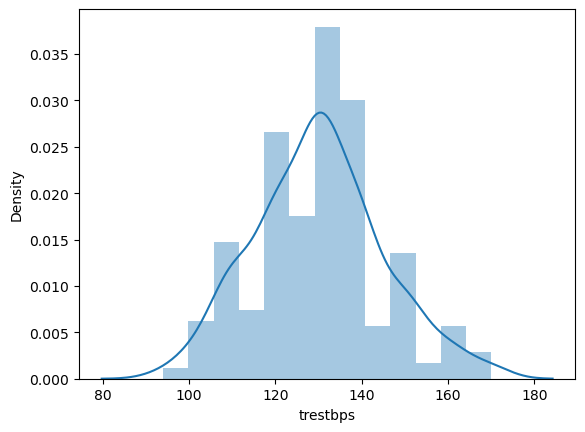

In [542]:
sns.distplot(df["trestbps"])

In [547]:
# Similarly treating Outliers for thalach& Oldpeak
Q1= df["oldpeak"].quantile (0.25)
Q3= df["oldpeak"].quantile (0.75)
IQR= Q3-Q1
outliers_oldpeak = Q3+1.5*(IQR)


In [548]:
df[df.oldpeak > outliers_oldpeak]

,target,age,cp,restecg,slope,ca,thal,exang,oldpeak,trestbps,thalach,sex
101,1,59,3,0,0,0,3,0,4.2,131.499795,145.0,1
204,0,62,0,0,0,3,3,0,6.2,160.000000,145.0,0
221,0,55,0,1,0,0,3,1,5.6,140.000000,111.0,1
250,0,51,0,1,1,3,3,1,4.2,140.000000,122.0,1
291,0,58,0,2,0,3,1,0,4.4,114.000000,140.0,1


In [541]:
df["oldpeak"].value_counts().head(5)

0.0    98
1.2    17
1.0    14
0.6    14
1.4    13
Name: oldpeak, dtype: int64

In [544]:
outliers_oldpeak

4.0

In [549]:
oldpeak_indx=df[df.oldpeak>outliers_oldpeak].index

In [550]:
oldpeak_indx

Int64Index([101, 204, 221, 250, 291], dtype='int64')

In [551]:
df.loc[oldpeak_indx, "oldpeak"]=outliers_oldpeak

In [552]:
df.loc[oldpeak_indx, "oldpeak"]

101    4.0
204    4.0
221    4.0
250    4.0
291    4.0
Name: oldpeak, dtype: float64

<Axes: xlabel='oldpeak'>

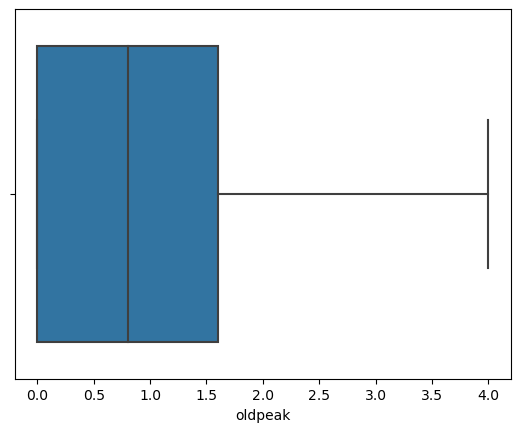

In [554]:
sns.boxplot(x="oldpeak", data=df)

In [571]:
Q1= df["thalach"].quantile(0.25)
Q3= df["thalach"].quantile(0.75)
IQR= Q3-Q1
outliers_thalach = Q3-2*(IQR)

# Changing to minus as the data is left skewed. Also increasing threshold as the data within threshold of 1.5 is much higher.

In [577]:
outliers_thalach 

100.75

In [573]:
df[df.thalach<outliers_thalach]

,target,age,cp,restecg,slope,ca,thal,exang,oldpeak,trestbps,thalach,sex
136,1,60,2,1,2,0,2,0,0.0,131.494851,96.0,0
198,0,62,0,1,1,2,3,1,1.8,120.000000,99.0,1
216,0,62,2,1,1,1,3,0,1.2,130.000000,97.0,0
233,0,64,0,0,0,1,2,1,2.2,120.000000,96.0,1
243,0,57,0,1,1,1,3,1,1.2,152.000000,88.0,1
262,0,53,0,1,1,2,3,1,2.0,123.000000,95.0,1
272,0,67,0,1,1,0,2,0,1.0,120.000000,71.0,1
297,0,59,0,0,1,2,1,0,1.0,164.000000,90.0,1


In [576]:
thalach_index= df[df.thalach<outliers_thalach].index

In [590]:
df.loc[thalach_index, "thalach"]= outliers_thalach 

In [591]:
df.loc[thalach_index, "thalach"]

136    100.75
198    100.75
216    100.75
233    100.75
243    100.75
262    100.75
272    100.75
297    100.75
Name: thalach, dtype: float64

<Axes: xlabel='thalach'>

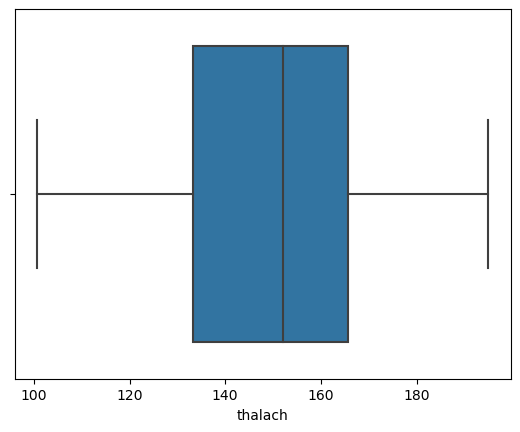

In [592]:
sns.boxplot(x="thalach", data=df)

<Axes: xlabel='thalach', ylabel='Density'>

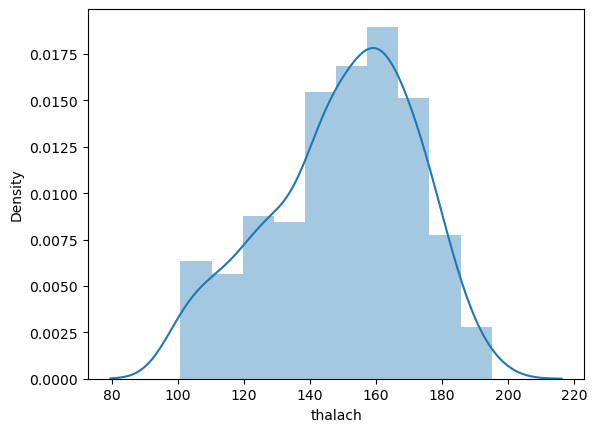

In [593]:
sns.distplot(df["thalach"])

### Encoding and Scaling the data

In [594]:
df1=df.copy()

In [596]:
df1.shape

(302, 12)

### Scaling Numeric datas that is not within a range of 0-1.

In [597]:
df1.head()

,target,age,cp,restecg,slope,ca,thal,exang,oldpeak,trestbps,thalach,sex
0,1,63,3,0,0,0,1,0,2.3,145.0,150.0,1
1,1,37,2,1,0,0,2,0,3.5,130.0,187.0,1
2,1,41,1,0,2,0,2,0,1.4,130.0,172.0,0
3,1,56,1,1,2,0,2,0,0.8,120.0,178.0,1
4,1,57,0,1,2,0,2,1,0.6,120.0,163.0,0


In [600]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc= StandardScaler()

In [603]:
df1[["age", "oldpeak", "trestbps", "thalach"]] = sc.fit_transform(df1[["age", "oldpeak", "trestbps", "thalach"]].copy())

In [604]:
df1.head()

,target,age,cp,restecg,slope,ca,thal,exang,oldpeak,trestbps,thalach,sex
0,1,0.949794,3,0,0,0,1,0,1.147606,1.011807,0.016293,1
1,1,-1.928548,2,1,0,0,2,0,2.230096,-0.000544,1.695277,1
2,1,-1.485726,1,0,2,0,2,0,0.335739,-0.000544,1.014608,0
3,1,0.174856,1,1,2,0,2,0,-0.205506,-0.675445,1.286876,1
4,1,0.285561,0,1,2,0,2,1,-0.385921,-0.675445,0.606206,0


In [628]:
cat_data= ["cp","restecg", "slope", "ca", "thal", "exang", "sex"]

In [630]:
# Applying one hot encoder
df_encoder = pd.get_dummies(df1, columns=cat_data, drop_first=True)

In [631]:
df_encoder.head()

,target,age,oldpeak,trestbps,thalach,cp_1,cp_2,cp_3,restecg_1,restecg_2,...,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,exang_1,sex_1
0,1,0.949794,1.147606,1.011807,0.016293,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,-1.928548,2.230096,-0.000544,1.695277,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1,-1.485726,0.335739,-0.000544,1.014608,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0.174856,-0.205506,-0.675445,1.286876,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,1,0.285561,-0.385921,-0.675445,0.606206,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0


In [632]:
df1= df_encoder.copy()

In [633]:
df1.head()

,target,age,oldpeak,trestbps,thalach,cp_1,cp_2,cp_3,restecg_1,restecg_2,...,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,exang_1,sex_1
0,1,0.949794,1.147606,1.011807,0.016293,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,-1.928548,2.230096,-0.000544,1.695277,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,1,-1.485726,0.335739,-0.000544,1.014608,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0.174856,-0.205506,-0.675445,1.286876,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
4,1,0.285561,-0.385921,-0.675445,0.606206,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0


### Data is ready for the modelling

In [791]:
X=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [792]:
X.head(2)

,age,oldpeak,trestbps,thalach,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,exang_1,sex_1
0,0.949794,1.147606,1.011807,0.016293,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,-1.928548,2.230096,-0.000544,1.695277,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [793]:
y.head(2)

0    1
1    1
Name: target, dtype: int64

### Applying Logistic Regression Model

In [794]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [795]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [796]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [797]:
y_pred= log_reg.predict(X_test)

In [798]:
# Checking Train and test scoreprint
print(" Test Score: ",log_reg.score(X_test, y_test))

 Test Score:  0.8681318681318682


In [799]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Report: ", classification_report(y_test, y_pred))

Accuracy Score:  0.8681318681318682
Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.88      0.88      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



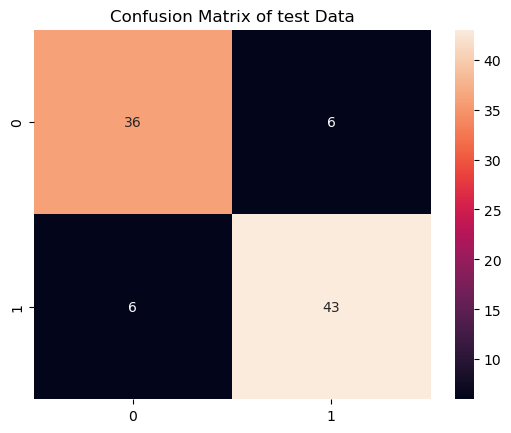

In [800]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Confusion Matrix of test Data")
plt.show()

In [801]:
y_pred_train= log_reg.predict(X_train)

In [802]:
print(" Train Score: ",log_reg.score(X_train, y_train))

 Train Score:  0.8625592417061612


### Accuracy score and other score shows that the data has almost no overfitiing and the model is reasonably a good fit.

In [803]:
print("Accuracy Score: ", accuracy_score(y_train, y_pred_train))
print("Report: ", classification_report(y_train, y_pred_train))

Accuracy Score:  0.8625592417061612
Report:                precision    recall  f1-score   support

           0       0.88      0.81      0.84        96
           1       0.85      0.90      0.88       115

    accuracy                           0.86       211
   macro avg       0.86      0.86      0.86       211
weighted avg       0.86      0.86      0.86       211



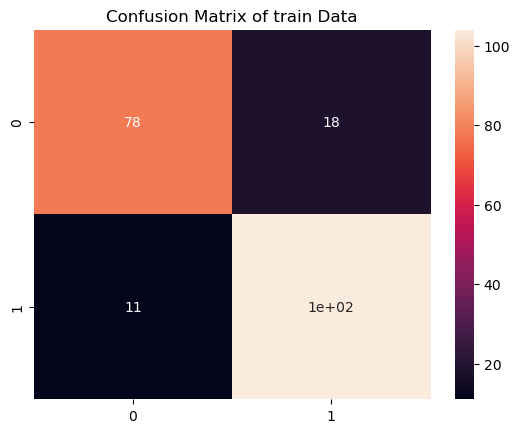

In [804]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)
plt.title("Confusion Matrix of train Data")
plt.show()

### Investigating Further using LDA with Linear Regression

In [805]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [806]:
lda=LinearDiscriminantAnalysis()
X_lda=lda.fit_transform(X,y)

In [826]:
X_train,X_test, y_train,y_test=train_test_split(X_lda, y, test_size=0.25, random_state=42)

In [827]:
log_reg_LDA=LinearDiscriminantAnalysis()

In [828]:
log_reg_LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [829]:
y_pred_lda= log_reg_LDA.predict(X_test)

In [830]:
print(" Test Score: ",log_reg_LDA.score(X_test, y_test))

 Test Score:  0.9078947368421053


In [831]:
y_pred_train_lda=log_reg_LDA.predict(X_train)

In [833]:
print(" Train Score: ",log_reg_LDA.score(X_train, y_train))

 Train Score:  0.8672566371681416


### We can see slight improvement in a data but at the sametime the difference between the test and train data is increasing with LDA. 

In [834]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_lda))
print("Report: ", classification_report(y_test, y_pred_lda))

Accuracy Score:  0.9078947368421053
Report:                precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.93      0.90      0.91        41

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



In [836]:
print("Accuracy Score: ", accuracy_score(y_train, y_pred_train_lda))
print("Report: ", classification_report(y_train, y_pred_train_lda))

Accuracy Score:  0.8672566371681416
Report:                precision    recall  f1-score   support

           0       0.89      0.81      0.85       103
           1       0.85      0.92      0.88       123

    accuracy                           0.87       226
   macro avg       0.87      0.86      0.86       226
weighted avg       0.87      0.87      0.87       226



### Random Forest Model

In [906]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()


In [915]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [916]:
y_pred_rf=rf.predict(X_train)

In [917]:
accuracy_score(y_train,y_pred_rf)

1.0

In [918]:
y_pred_test_rf=rf.predict(X_test)

In [919]:
accuracy_score(y_test,y_pred_test_rf)

0.8241758241758241

### Changing parameter 

In [922]:
from sklearn.ensemble import RandomForestClassifier
rf_param= RandomForestClassifier(n_estimators=200, max_depth=4)

In [923]:
rf_param.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [924]:
y_pred_rf_param=rf_param.predict(X_train)

In [925]:
accuracy_score(y_train,y_pred_rf_param)

0.8957345971563981

In [926]:
y_pred_test_rf_param=rf_param.predict(X_test)

In [928]:
accuracy_score(y_test,y_pred_test_rf_param)

0.8461538461538461

### Changing parameter is giving better value. The accuracy_score of test and train value is better with an implementation of paramaters

In [930]:
from sklearn.model_selection import cross_val_score

In [942]:
cross_val_score(rf_param, X_train,y_train, cv=5).mean() # Training Score

0.8053156146179402

In [933]:
cross_val_score(rf_param, X_test,y_test, cv=5).mean() # Test Data

0.7912280701754385

In [935]:
# Applying Grid Search CV
from sklearn.model_selection import GridSearchCV

In [943]:
param_grid={
    "n_estimators":[20,50,100,150],
    "max_depth":[3,5,7,9],
    "min_samples_leaf":[3,5,7,9]
}
grid_search= GridSearchCV(rf, param_grid, cv=4, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=4, n_estimators=200),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'n_estimators': [20, 50, 100, 150]},
             verbose=1)

In [945]:
cross_val_score(grid_search.best_estimator_, X_train,y_train, cv=4).mean() # Training Score

0.8104136429608129

In [946]:
cross_val_score(grid_search.best_estimator_, X_test,y_test, cv=4).mean()

0.7579051383399209

### The conclusion of this project is every model is important to visualize the data and as a ML person, it is advisable to use every technique to find the best model. 

### For this project, The Linear Regression using LDA algorithm produced the best possible results.

### The further process can be done by dropping few more columns. 